# Intro

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import matplotlib.colors as mcolors
%matplotlib nbagg
import xarray as xr
import xmitgcm as xgcm
import matplotlib.mlab as mlab
import jmkfigure
import glob
import scipy.io as sio
import scipy.special as ssp
import datetime;
import json
import os.path
import shutil
import itertools
import matplotlib.gridspec as gridspec

plt.style.use(['ggplot','monofontjmk'])

namelist = 'FigureList.json'
if (~os.path.isfile(namelist)):
    with open(namelist, mode='w', encoding='utf-8') as f:
        json.dump([], f)

/Users/jklymak/matplotlib/lib/matplotlib/style/core.py:203: UserWarning: In /Users/jklymak/.matplotlib/stylelib/ggplotjmk.mplstyle: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(message)


In [2]:
def addtojson(name):
    with open(namelist, mode='r', encoding='utf-8') as f:
        feed = json.load(f)
    print(feed)
    feed = list(set([name]) | set(feed))
    print(feed)
    with open(namelist, mode='w', encoding='utf-8') as f:
        json.dump(feed, f)
    # cp from doc to writeups/figures
    for ff in feed:
        fs = glob.glob('doc/'+ff+'.*')
        for fn in fs:
            print(fn)
            shutil.copy(fn,'leewaves17/figures')
#addtojson('Whooo')
N0=1e-3
g=9.8
alpha = 2e-4
dz=10.
T0 = 28-np.cumsum(N0**2/g/alpha*dz*np.ones(400))

# Mean Temperature profiles...

Originally in `LWRegrid2/`

<IPython.core.display.Javascript object>


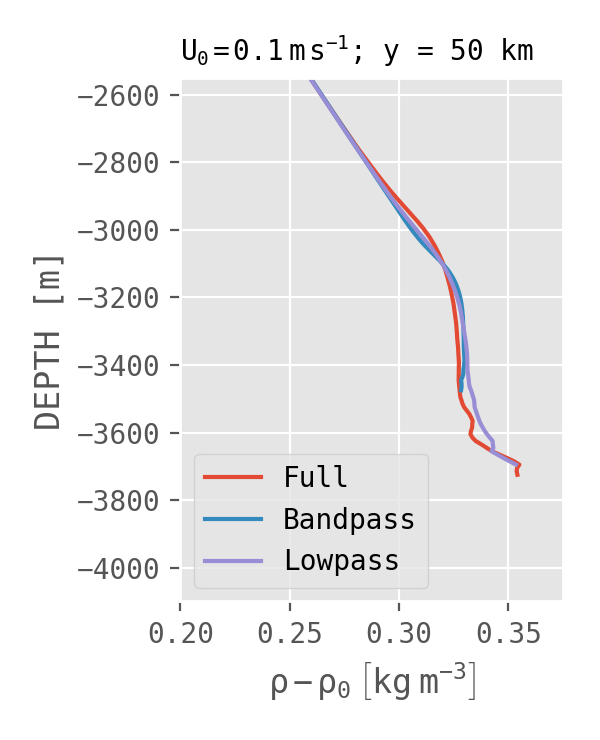

<xarray.DataArray 'YC' ()>
array(5050.0)
Coordinates:
    iter     int64 14400
    time     timedelta64[ns] 20:00:00
    YC       float64 5.05e+03
    YG       float64 5e+03
Attributes:
    coordinate:     YC XC
    units:          m
    standard_name:  plane_y_coordinate
    long_name:      y coordinate
<xarray.DataArray 'YC' ()>
array(5050.0)
Coordinates:
    iter     int64 4800
    time     timedelta64[ns] 20:00:00
    YC       float64 5.05e+03
    YG       float64 5e+03
Attributes:
    coordinate:     YC XC
    units:          m
    standard_name:  plane_y_coordinate
    long_name:      y coordinate
<xarray.DataArray 'YC' ()>
array(5050.0)
Coordinates:
    iter     int64 7200
    time     timedelta64[ns] 20:00:00
    YC       float64 5.05e+03
    YG       float64 5e+03
Attributes:
    coordinate:     YC XC
    units:          m
    standard_name:  plane_y_coordinate
    long_name:      y coordinate
['MeanTemperatureProfiles']
['MeanTemperatureProfiles']
doc/MeanTemperatureProfiles.

In [8]:
# U
todo = ['full','filt','low']
lab = ['Full','Bandpass','Lowpass']
clim=0.1
fig,ax = plt.subplots(1,1,sharex=True,figsize=(3.,3.7), constrained_layout=True)
#fig.subplots_adjust(left=0.225,right=0.775,bottom=0.15)

for zoom in [True]:
    
    for nn,td in enumerate(todo):
        ds = xr.open_dataset('LWRegrid2/LWRegrid2%s01U10SliceY50.nc'%td,engine='netcdf4')
        print(ds['YC'])
        x=ds['XG']/1e3
        x=x-x.mean()
        z = ds['Z']
        #if nn==0:
        #    ax.plot((T0[0]-T0)*0.2,z,'k--',label='Initial')
        u = np.ma.masked_where(ds['hFacW']<0.02,ds['T']).mean(axis=1)
        ax.plot((u[0]-u)*0.2,z,label=lab[nn])
            
        ax.set_xlabel('$\\rho-\\rho_{0}\ \\left[kg\\ m^{-3}\\right]$')
        ax.set_ylabel('DEPTH [m]')
        ax.set_title('$U_0 = 0.1\ m\,s^{-1}$; y = 50 km',loc='left',fontsize='medium')
        
        if zoom:
            ax.set_ylim([-4100, -2550])
            ax.set_xlim([0.2, 0.375])
        ax.legend()
    fig.tight_layout()  
    if 1:
        name = 'MeanTemperatureProfiles'
        jmkfigure.jmkprint(name,'PaperPlots.ipynb')
        addtojson(name)
            

# Topographic Spectra and Example Spectra

Originally in `LWRegrid2/`

<xarray.Dataset>
Dimensions:                        (XC: 4096, YC: 1184)
Coordinates:
  * XC                             (XC) float64 50.0 150.0 250.0 350.0 450.0 ...
  * YC                             (YC) float64 50.0 150.0 250.0 350.0 450.0 ...
    Depth                          (YC, XC) float64 3.34e+03 3.34e+03 ...
    rA                             (YC, XC) float64 1e+04 1e+04 1e+04 1e+04 ...
Data variables:
    __xarray_dataarray_variable__  (YC, XC) float64 3.34e+03 3.34e+03 ...
Attributes:
    __xarray_dataarray_name__:  Depth


<IPython.core.display.Javascript object>


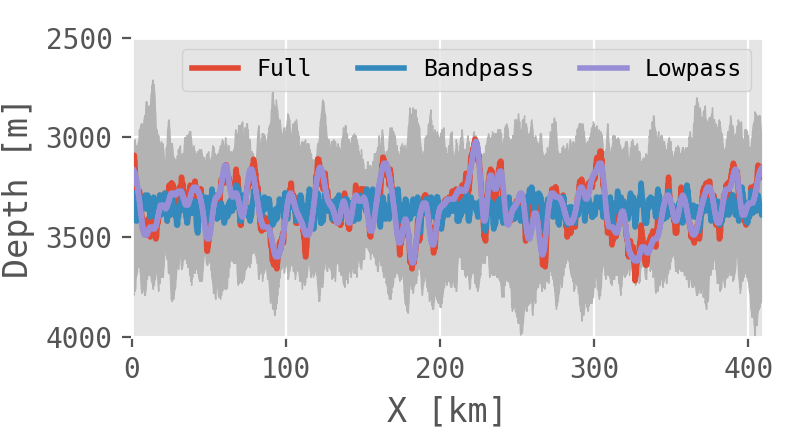

<xarray.DataArray 'Depth' ()>
array(40.300981990575316)
<xarray.DataArray 'Depth' ()>
array(150.656498062454)
<xarray.DataArray 'Depth' ()>
array(145.1651700314965)
<xarray.DataArray 'Depth' ()>
array(197.65542063474382)
<xarray.DataArray 'Depth' ()>
array(660.4205681714355)
<xarray.DataArray 'Depth' ()>
array(562.5592329850716)
['MeanTemperatureProfiles', 'TopoAll', 'DepthsAndProfiles']
['MeanTemperatureProfiles', 'TopoAll', 'DepthsAndProfiles']
doc/MeanTemperatureProfiles.pdf
doc/MeanTemperatureProfiles.png
doc/MeanTemperatureProfiles.svg
doc/MeanTemperatureProfiles.tex
doc/TopoAll.pdf
doc/TopoAll.png
doc/TopoAll.svg
doc/TopoAll.tex
doc/DepthsAndProfiles.pdf
doc/DepthsAndProfiles.png
doc/DepthsAndProfiles.svg
doc/DepthsAndProfiles.tex


In [37]:
td = ['DepthLWRegrid2filt01U10.nc','DepthLWRegrid2full01U10.nc','DepthLWRegrid2low01U10.nc']
ds = []
for nn,todo in enumerate(td):
    ds += [xr.open_dataset('LWRegrid2/'+todo)]
print(ds[0])
# plot with just slice of topo...
fig,ax = plt.subplots(figsize=(4,2.2))
maxx = np.max(ds[1]['Depth'],axis=0)
minn = np.min(ds[1]['Depth'],axis=0)
ax.fill_between(ds[1]['XC']/1e3,maxx,minn,color='0.7')

#ax.plot(ds[1]['XC']/1e3,ds[1]['Depth'].T,color='0.8',alpha=0.3,label='')
ax.plot(ds[1]['XC']/1e3,ds[1]['Depth'][500,:],label='Full',lw=2)
ax.plot(ds[1]['XC']/1e3,ds[0]['Depth'][500,:],label='Bandpass',lw=2)
ax.set_xlim([150,162])
ax.set_xlabel('X [km]')
ax.set_ylabel('Depth [m]')
#if 1:
#    jmkfigure.jmkprint('TopoFilteredZoom','PaperPlots.ipynb')
ax.plot(ds[1]['XC']/1e3,ds[2]['Depth'][500,:],label='Lowpass',lw=2)
if 1:
    jmkfigure.jmkprint('TopoAllZoom','PaperPlots.ipynb')
#ax.set_xlim([0,400])
ax.legend(fontsize='small',ncol=3)
print(np.std(ds[0]['Depth']))
print(np.std(ds[1]['Depth']))
print(np.std(ds[2]['Depth']))
print(np.sqrt(np.mean((ds[0]['Depth']-ds[0]['Depth'].min())**2)))
print(np.sqrt(np.mean((ds[1]['Depth']-ds[1]['Depth'].min())**2)))
print(np.sqrt(np.mean((ds[2]['Depth']-ds[2]['Depth'].min())**2)))
ax.set_xlim([0.,ds[1]['XC'][-1]/1e3])
ax.set_ylim([4000.,2500.])
fig.tight_layout()
if 1:
    
    jmkfigure.jmkprint('TopoAll','PaperPlots.ipynb')
    addtojson('TopoAll')

<IPython.core.display.Javascript object>


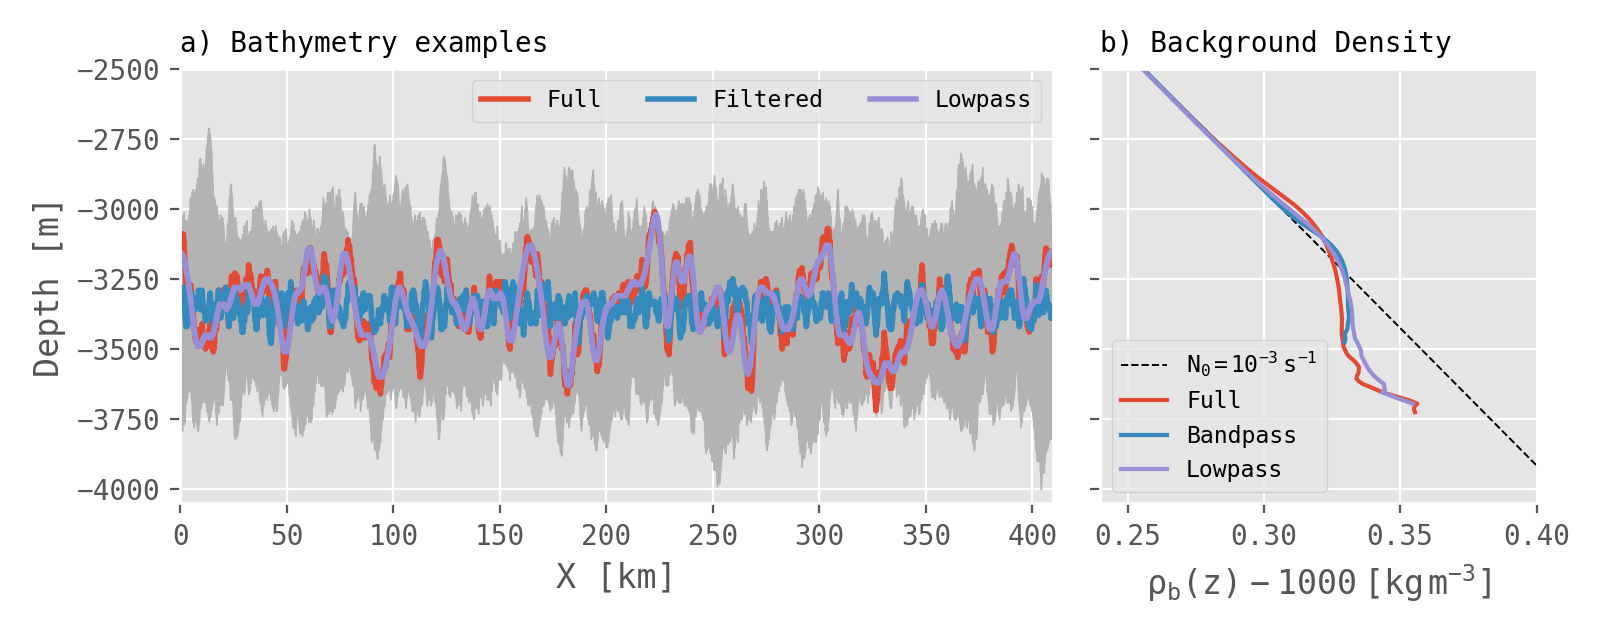

<xarray.Dataset>
Dimensions:                        (XC: 4096, YC: 1184)
Coordinates:
  * XC                             (XC) float64 50.0 150.0 250.0 350.0 450.0 ...
  * YC                             (YC) float64 50.0 150.0 250.0 350.0 450.0 ...
    Depth                          (YC, XC) float64 3.34e+03 3.34e+03 ...
    rA                             (YC, XC) float64 1e+04 1e+04 1e+04 1e+04 ...
Data variables:
    __xarray_dataarray_variable__  (YC, XC) float64 3.34e+03 3.34e+03 ...
Attributes:
    __xarray_dataarray_name__:  Depth
[0.0, 0.0, 0.0]
<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
    time     timedelta64[ns] 20:15:00
    iter     int64 14580
    PHrefC   (Z) float64 49.05 147.2 245.2 343.4 441.5 539.6 637.6 735.8 ...
    drF      (Z) float64 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 ...
Data variables:
    KE       (Z) float64 2.5e+08 2.499e+08 2.497e+08 2.495e+08 2.492e+08 ...
  

/Users/jklymak/matplotlib/lib/matplotlib/figure.py:2161: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.     You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplotswith the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure "


['MeanTemperatureProfiles', 'TopoAll', 'DepthsAndProfiles']
['MeanTemperatureProfiles', 'TopoAll', 'DepthsAndProfiles']
doc/MeanTemperatureProfiles.pdf
doc/MeanTemperatureProfiles.png
doc/MeanTemperatureProfiles.svg
doc/MeanTemperatureProfiles.tex
doc/TopoAll.pdf
doc/TopoAll.png
doc/TopoAll.svg
doc/TopoAll.tex
doc/DepthsAndProfiles.pdf
doc/DepthsAndProfiles.png
doc/DepthsAndProfiles.svg
doc/DepthsAndProfiles.tex


In [34]:
# Combined:

#a)

fig = plt.figure(figsize=(8,3.2), constrained_layout=True)
gs = gridspec.GridSpec(1, 2, width_ratios=[4,2])

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax = ax1

td = ['DepthLWRegrid2filt01U10.nc','DepthLWRegrid2full01U10.nc','DepthLWRegrid2low01U10.nc']
ds = []
for nn,todo in enumerate(td):
    ds += [xr.open_dataset('LWRegrid2/'+todo)]
print(ds[0])
# plot with just slice of topo...
maxx = np.max(-ds[1]['Depth'],axis=0)
minn = np.min(-ds[1]['Depth'],axis=0)
ax.fill_between(ds[1]['XC']/1e3,maxx,minn,color='0.7')

#ax.plot(ds[1]['XC']/1e3,ds[1]['Depth'].T,color='0.8',alpha=0.3,label='')
ax.plot(ds[1]['XC']/1e3,-ds[1]['Depth'][500,:],label='Full',lw=2)
ax.plot(ds[1]['XC']/1e3,-ds[0]['Depth'][500,:],label='Bandpass',lw=2)
ax.set_xlim([150,162])
ax.set_xlabel('X [km]')
ax.set_ylabel('Depth [m]')
#if 1:
#    jmkfigure.jmkprint('TopoFilteredZoom','PaperPlots.ipynb')
ax.plot(ds[1]['XC']/1e3,-ds[2]['Depth'][500,:],label='Lowpass',lw=2)
if 0:
    jmkfigure.jmkprint('TopoAllZoom','PaperPlots.ipynb')
#ax.set_xlim([0,400])
ax.legend(fontsize='small',ncol=3)

ax.set_xlim([0.,ds[1]['XC'][-1]/1e3])
ax.set_title('a) Bathymetry examples', size='medium', loc='left')

# b)
todo = ['full','filt','low']
Name = ['Full', 'Bandpass', 'Lowpass']
#fig,axs = plt.subplots(figsize=(3.75,4))
axs = ax2
energy = np.zeros(len(todo)).tolist()
print(energy)
for nn,td in enumerate(todo):
    for n in [1]:
        fname = glob.glob('LWRegrid2/EnergyDemeanLWRegrid2%s01U100000*Step%03d.nc'%(td,n))
        energy[n]=xr.open_dataset(fname[0])
        print(energy[n])
        good = np.where(energy[n])
        if nn==0:
            axs.plot((-T0+28.)*2e-1,energy[n]['Z'], 
                 'k--', label='$N_0 = 10^{-3}\ s^{-1}$', lw=0.7 )
        dds = xr.open_dataset('LWRegrid2/LWRegrid2%s01U10SliceY50.nc'%td,engine='netcdf4')
        u = (-np.ma.masked_where(dds['hFacW']<0.02,dds['T']).mean(axis=1) + 28.) * 0.2
        
        axs.plot(u, z, label=lab[nn])
for ax in [ax1, ax2]:
    ax.set_ylim([-4050,-2500])
axs.set_xlim([0.24,0.4])
ax2.set_yticklabels('')
#axs.set_ylabel('DEPTH [m]')
axs.set_xlabel(r'$\rho_b(z)\,-\,1000\ [kg\, m^{-3}]$')
axs.legend(fontsize='small')
axs.set_title('b) Background Density', size='medium', loc='left')
fig.tight_layout()
if 1:
    name = 'DepthsAndProfiles'
    jmkfigure.jmkprint(name,'PaperPlots.ipynb')   
    addtojson(name)

In [38]:
## Power spectrum
indy = range(1148)
p = [None]*3
nfft = 4096
for ind in range(3):
    p[ind]=0.
    for jj in indy:
        pp,f = mlab.psd(ds[ind]['Depth'][jj,:],NFFT=nfft,Fs=1./0.1,detrend='mean')
        p[ind]+=pp/1148.   

<IPython.core.display.Javascript object>


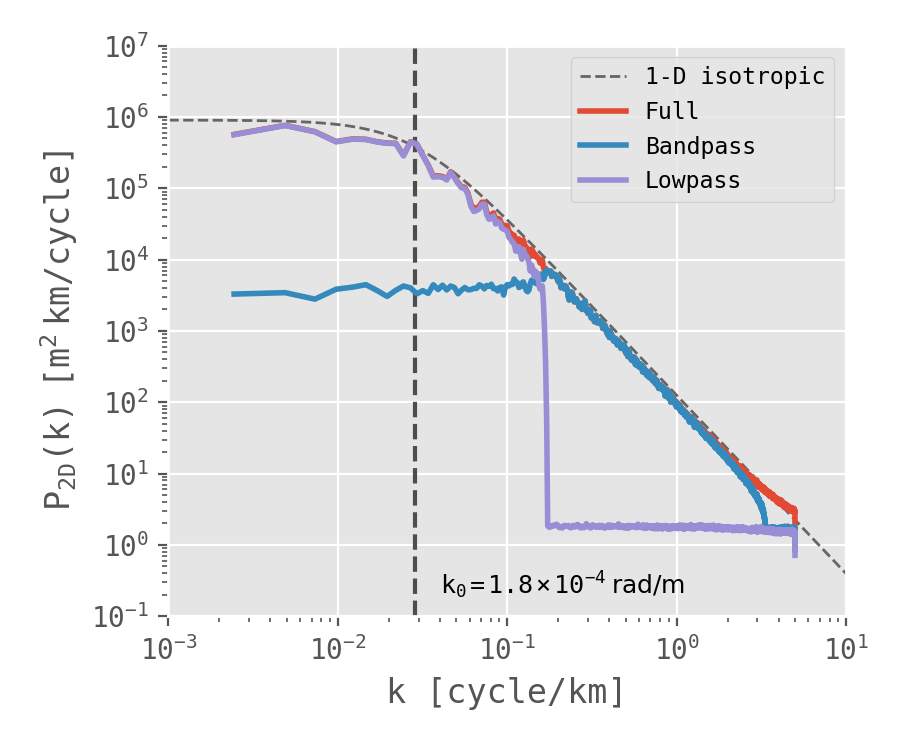

Bandpass
1.74803836953
['MeanTemperatureProfiles', 'TopoAll', 'DepthsAndProfiles']
['MeanTemperatureProfiles', 'TopoAll', 'TopoSpec', 'DepthsAndProfiles']
doc/MeanTemperatureProfiles.pdf
doc/MeanTemperatureProfiles.png
doc/MeanTemperatureProfiles.svg
doc/MeanTemperatureProfiles.tex
doc/TopoAll.pdf
doc/TopoAll.png
doc/TopoAll.svg
doc/TopoAll.tex
doc/TopoSpec.pdf
doc/TopoSpec.png
doc/TopoSpec.svg
doc/TopoSpec.tex
doc/DepthsAndProfiles.pdf
doc/DepthsAndProfiles.png
doc/DepthsAndProfiles.svg
doc/DepthsAndProfiles.tex


In [40]:
fig,ax=plt.subplots(figsize=(4.5,3.75), constrained_layout=True)
#fig.subplots_adjust(left=0.17,bottom=0.13)
lab = ['Bandpass','Full','Lowpass']
print(lab[0])
ax.axvline(1.8e-4*1000/2./np.pi,ls='--',color='0.3')
ax.text(1.8e-4*1000/2./np.pi,2e-1,' $\ \ k_0 = 1.8\\times10^{-4}\ \mathrm{rad/m}$',fontsize=9)
k0=1.8e-4;mu=3.5;h=305
ff = np.logspace(-3.,1.,1000)
print(ssp.beta(0.5,(mu-1.)/2.))
theory = h**2*(k0**(mu-2.))*ssp.beta(0.5,(mu-1.)/2.)*(k0**2+(ff/1.e3*np.pi*2.)**2)**(-0.5*(mu-1.))/1.e3
ax.loglog(ff,theory,ls='--',color='0.4',lw=1.,label='1-D isotropic')
#ax.loglog(f,20*f**(-3.5/2),lw=1,ls='--',color='k')
ax.set_xlabel('k [cycle/km]')
ax.set_ylabel('$P_{2D}(k)\ \ [m^2\ km/cycle]$')
for ind in [1,0,2]:
    ax.loglog(f,p[ind],label=lab[ind],lw=2)
    ax.set_xlim([1e-3,10])
    ax.set_ylim([0.1,1e7])  
fig.tight_layout()
ax.legend(fontsize='small')

if 1:
    jmkfigure.jmkprint('TopoSpec','PlotEnergyCoarse.ipynb')
    addtojson('TopoSpec')

In [41]:
# calc rms slope in x of low:
slopesp= p[2] * 4*np.pi * (f/1e3)**2
np.sqrt(slopesp.sum()*np.median(np.diff(f)))

0.035144576123707603

# Plote Slices

<IPython.core.display.Javascript object>


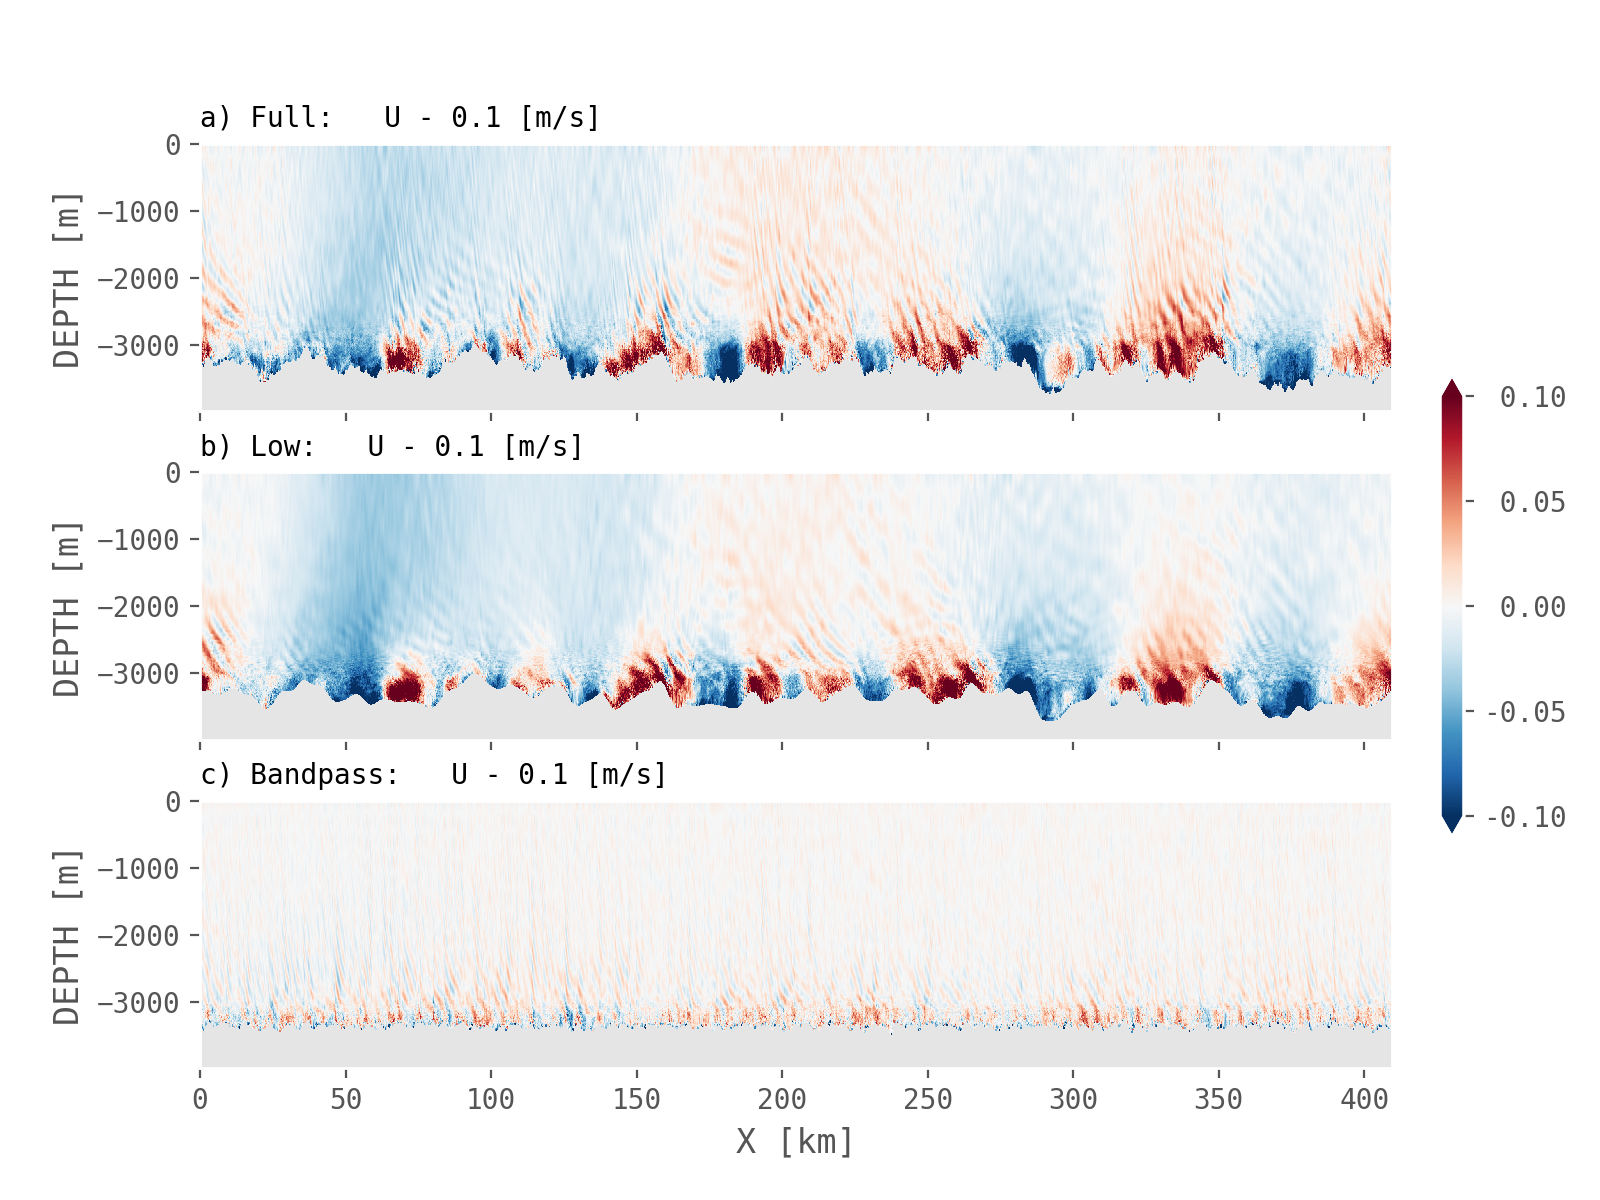

/Users/jklymak/matplotlib/lib/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


['MeanTemperatureProfiles', 'TopoAll', 'TopoSpec', 'DepthsAndProfiles']
['TopoAll', 'DepthsAndProfiles', 'MeanTemperatureProfiles', 'SnapsRegrid2U', 'TopoSpec']
doc/TopoAll.pdf
doc/TopoAll.png
doc/TopoAll.svg
doc/TopoAll.tex
doc/DepthsAndProfiles.pdf
doc/DepthsAndProfiles.png
doc/DepthsAndProfiles.svg
doc/DepthsAndProfiles.tex
doc/MeanTemperatureProfiles.pdf
doc/MeanTemperatureProfiles.png
doc/MeanTemperatureProfiles.svg
doc/MeanTemperatureProfiles.tex
doc/SnapsRegrid2U.pdf
doc/SnapsRegrid2U.png
doc/SnapsRegrid2U.svg
doc/SnapsRegrid2U.tex
doc/TopoSpec.pdf
doc/TopoSpec.png
doc/TopoSpec.svg
doc/TopoSpec.tex


<IPython.core.display.Javascript object>


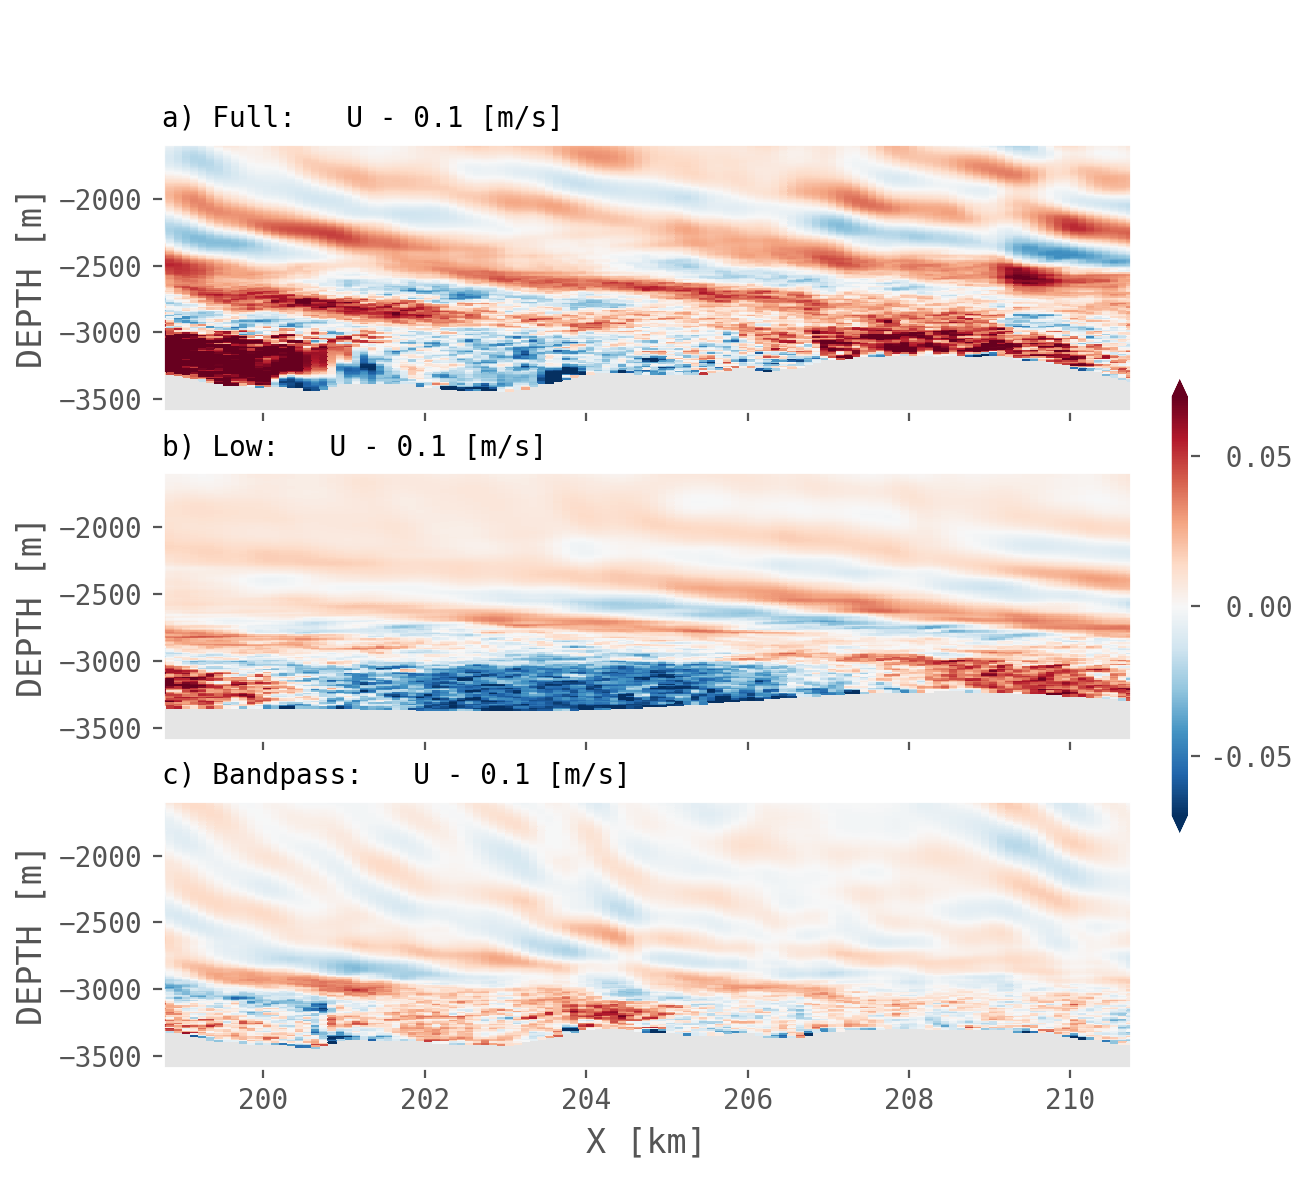

['TopoAll', 'DepthsAndProfiles', 'MeanTemperatureProfiles', 'SnapsRegrid2U', 'TopoSpec']
['SnapsRegrid2U', 'SnapsRegrid2UZoom', 'DepthsAndProfiles', 'MeanTemperatureProfiles', 'TopoAll', 'TopoSpec']
doc/SnapsRegrid2U.pdf
doc/SnapsRegrid2U.png
doc/SnapsRegrid2U.svg
doc/SnapsRegrid2U.tex
doc/SnapsRegrid2UZoom.pdf
doc/SnapsRegrid2UZoom.png
doc/SnapsRegrid2UZoom.svg
doc/SnapsRegrid2UZoom.tex
doc/DepthsAndProfiles.pdf
doc/DepthsAndProfiles.png
doc/DepthsAndProfiles.svg
doc/DepthsAndProfiles.tex
doc/MeanTemperatureProfiles.pdf
doc/MeanTemperatureProfiles.png
doc/MeanTemperatureProfiles.svg
doc/MeanTemperatureProfiles.tex
doc/TopoAll.pdf
doc/TopoAll.png
doc/TopoAll.svg
doc/TopoAll.tex
doc/TopoSpec.pdf
doc/TopoSpec.png
doc/TopoSpec.svg
doc/TopoSpec.tex


In [42]:
todo = ['full','low','filt']
Name = ['a) Full','b) Low','c) Bandpass']
import matplotlib.ticker as ticker
for zoom in [False,True]:
    if zoom:
        fig,axs = plt.subplots(3,1,sharex=True,figsize=(6.5,6))
    else:
        fig,axs = plt.subplots(3,1,sharex=True,figsize=(8,6))
    fig.subplots_adjust(right=0.87,hspace=0.23)
    for nn,td in enumerate(todo):
        ds = xr.open_dataset('LWRegrid2/LWRegrid2%s01U10SliceY50.nc'%td)
        x=ds['XG']/1e3
        
        z = ds['Z']
        ax = axs[nn]
        u = np.ma.masked_where(ds['hFacW']<0.02,ds['U'])-0.1
        u = (u+np.roll(u,1,axis=1))/2.
        u = (u+np.roll(u,1,axis=0))/2.
        
        pc=ax.pcolormesh(x,z,u,rasterized=True,vmin=-.1,vmax=.1,cmap='RdBu_r')
       
        jmkfigure.colorbarRight(pc,ax=axs,fig=fig,format='%5.2f',
                                width=0.015,extend='both',shrink=0.5,ticks = np.arange(-.1,0.11,.05))
#        cb=fig.colorbar(pc,ax=ax,extend='both',shrink=0.9,
#                       ticks = np.arange(-.1,0.11,.05),)
        #ticklabs = cb.ax.get_yticklabels()
        #cb.ax.set_yticklabels(ticklabs,ha='right')
        #cb.ax.yaxis.set_tick_params(pad=32)
        #ax.set_xlim([-140.,140])
        ax.set_ylim([-3990.,0.])
        if zoom:
            ax.set_xlim(np.array([-6.,6.])+np.mean(x.values))
            pc.set_clim([-0.07,0.07])
            ax.set_ylim([-3590.,-1590.])
            
        ax.set_xlabel('')
        ax.set_ylabel('DEPTH [m]')
        ax.set_title(Name[nn]+ ':   U - 0.1 [m/s]',loc='left',fontsize='medium')

        if nn==2:
            ax.set_xlabel('X [km]')
    #fig.tight_layout(rect = (0,0,0.87,1))
    if 1:
        if zoom:
            jmkfigure.jmkprint('SnapsRegrid2UZoom','PlotEnergyCoarse.ipynb',bbinch='tight')
            addtojson('SnapsRegrid2UZoom')
        else:
            jmkfigure.jmkprint('SnapsRegrid2U','PlotEnergyCoarse.ipynb',bbinch='tight')
            addtojson('SnapsRegrid2U')


# Plot Temperature Spectra

<IPython.core.display.Javascript object>


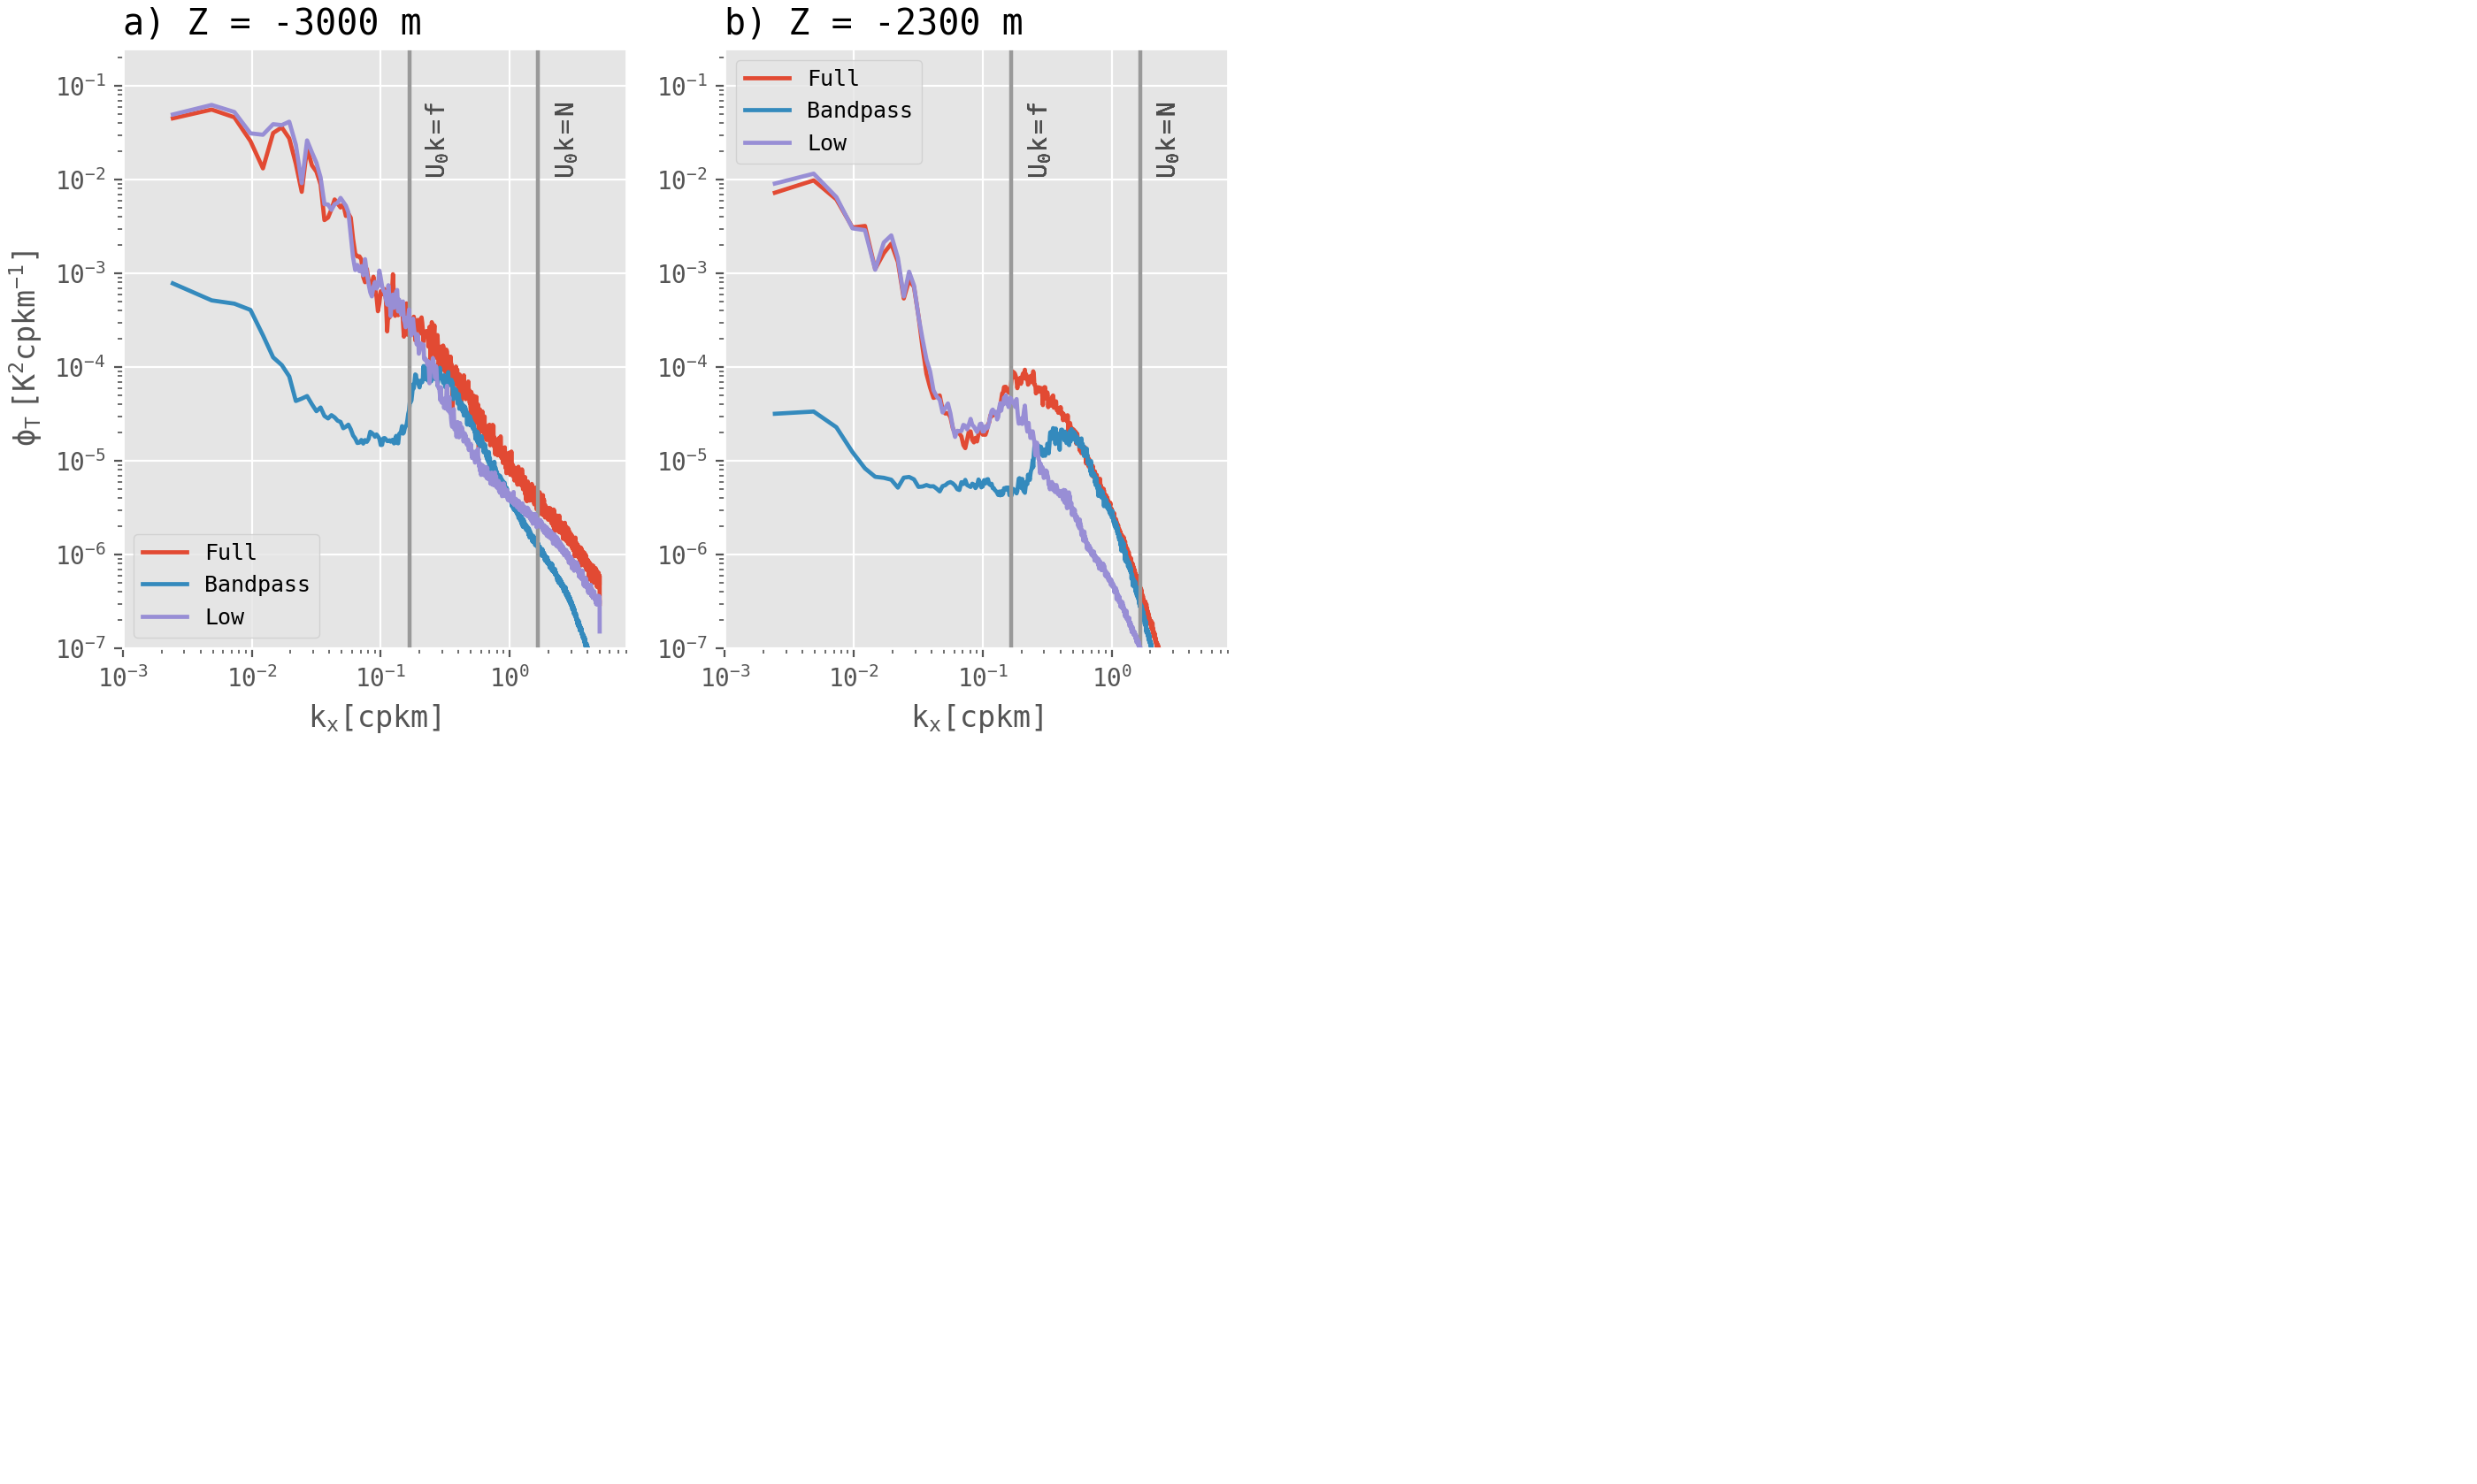

[  1.85178563e-03   7.25819466e-03   9.82637851e-03 ...,   6.73697632e-09
   6.62323667e-09   3.22329722e-09]
[  5.00135723e-06   3.18606886e-05   3.36527725e-05 ...,   3.29371341e-09
   3.39402844e-09   1.62053264e-09]
[  2.30346758e-03   9.09254899e-03   1.15975506e-02 ...,   2.17926764e-09
   2.18272630e-09   1.06507473e-09]
['TempSpec', 'SnapsRegrid2UZoom', 'SnapsRegrid2U', 'TopoSpec', 'DepthsAndProfiles', 'MeanTemperatureProfiles', 'TopoAll']
['TempSpec', 'SnapsRegrid2UZoom', 'SnapsRegrid2U', 'TopoSpec', 'DepthsAndProfiles', 'MeanTemperatureProfiles', 'TopoAll']
doc/TempSpec.pdf
doc/TempSpec.png
doc/TempSpec.svg
doc/TempSpec.tex
doc/SnapsRegrid2UZoom.pdf
doc/SnapsRegrid2UZoom.png
doc/SnapsRegrid2UZoom.svg
doc/SnapsRegrid2UZoom.tex
doc/SnapsRegrid2U.pdf
doc/SnapsRegrid2U.png
doc/SnapsRegrid2U.svg
doc/SnapsRegrid2U.tex
doc/TopoSpec.pdf
doc/TopoSpec.png
doc/TopoSpec.svg
doc/TopoSpec.tex
doc/DepthsAndProfiles.pdf
doc/DepthsAndProfiles.png
doc/DepthsAndProfiles.svg
doc/DepthsAndProfile

In [47]:
fig,axs=plt.subplots(1, 2, figsize=(10*0.7,6*0.7),
                    constrained_layout=True)
# fig.subplots_adjust(bottom=0.2)
nm = ['Full','Bandpass','Low']
for nnn,td in enumerate(['full','filt','low']):
    ds = xr.open_dataset('LWRegrid2/LWRegrid2%s01U10SliceZ230.nc'%td)
    ny = ds.dims['YC']
    
    nx = ds.dims['XC']
    pp = 0.

    ax = axs[1]
    ax.axvline(1./6.,color='0.6')
    ax.axvline(1./0.6,color='0.6')
    ax.text(1./6.+0.05,4e-2,'$\ U_0 k = f$',rotation=90,color='0.3')
    ax.text(1./.6+0.5,4e-2,'$\ U_0 k = N$',rotation=90,color='0.3')

    if not os.path.exists('./spec2300%s.pickle'%td):
        print('Calc spectra')
        for j in range(ny):
            p,f = mlab.psd(ds['T'][j,:],NFFT=nx,Fs=1./0.1,detrend='mean')
            pp+=p/ny
        spec =dict()
        spec['p']=pp;spec['f']=f
        with open('./spec2300%s.pickle'%td,'wb') as ff:
            pickle.dump(spec,ff)
    else:
        with open('./spec2300%s.pickle'%td,'rb') as ff:
            spec = pickle.load(ff)
            pp = spec['p'];f=spec['f']
    print(pp)
    
    h,=ax.loglog(f,pp,lw=1.7,label=nm[nnn])
    ax.set_title('b) Z = -2300 m',loc='left')
    ax.set_xlabel('$k_x [cpkm]$')
    #ax.legend(fontsize=9)
    
    # 3000 m
    
    ax=axs[0]
    ax.axvline(1./6.,color='0.6')
    ax.axvline(1./0.6,color='0.6')
    
    ds = xr.open_dataset('LWRegrid2/LWRegrid2%s01U10SliceZ300.nc'%td)
    pp = 0.
    if not os.path.exists('./spec3000%s.pickle'%td):
        tt = ds['T'].values
        print(len(tt[tt<120]))
        print(len(tt[tt<20]))
        tt[tt<20]=np.mean(tt[tt>20])*np.NaN
        numg = 0;
        for j in range(ny):
            if np.isfinite(np.mean(tt[j,:])):
                p,f = mlab.psd(tt[j,:],NFFT=nx,Fs=1./0.1,detrend='mean')
                pp+=p
                numg+=1
        pp = pp/numg
        print('Number good: %d'%numg)
        spec =dict()
        spec['p']=pp;spec['f']=f
        with open('./spec3000%s.pickle'%td,'wb') as ff:
            pickle.dump(spec,ff)
    else:
        with open('./spec3000%s.pickle'%td,'rb') as ff:
            spec = pickle.load(ff)
            pp = spec['p'];f=spec['f']
            
    ax.loglog(f,pp,color=h.get_color(),lw=1.7,label=nm[nnn])
    ax.set_title('a) Z = -3000 m',loc='left')
    ax.set_ylabel('$\phi_T\ [K^2 cpkm^{-1}]$')
    ax.set_xlabel('$k_x [cpkm]$')
    for ax in axs:
        ax.set_ylim([1e-7,0.25])
        ax.set_xlim([1e-3,8])
        ax.text(1./6.+0.05,4e-2,'$\ U_0 k = f$',rotation=90,color='0.3')
        ax.text(1./.6+0.5,4e-2,'$\ U_0 k = N$',rotation=90,color='0.3')
        ax.legend(fontsize=9)
    
if 1:
    jmkfigure.jmkprint('TempSpec','PlotEnergySpeeds.ipynb')
    addtojson('TempSpec')

In [93]:
print(len(tt[tt<26.5]))

4849664


# Plot Energy Budget base case

## U10 full res cases

In [58]:
# import seaborn as sns
if 1:  # OLD
    palette0 = [(0.29803921568627451, 0.44705882352941179, 0.69019607843137254),
     (0.33333333333333331, 0.6588235294117647, 0.40784313725490196),
     (0.7686274509803922, 0.30588235294117649, 0.32156862745098042),
     (0.50588235294117645, 0.44705882352941179, 0.69803921568627447),
     (0.80000000000000004, 0.72549019607843135, 0.45490196078431372),
     (0.39215686274509803, 0.70980392156862748, 0.80392156862745101)]

    todo = ['full','low','filt']
    Name = ['a) Full: 20h','b) Lowpass: 20h','c) Bandpass: 20h']
    fig,axs = plt.subplots(1,3,figsize=(12,8), constrained_layout=True)
    for nn,td in enumerate(todo):
        palette = itertools.cycle(palette0)
        print(td)
        # with open('EnergyDemeanLWRegrid2low01U100000007380.pickle','r') as f:
        energy = [[],[],[]]
        for n in range(3):
            fname = glob.glob('LWRegrid2/EnergyDemeanLWRegrid2%s01U100000073800Step%03d.nc'%(td,n))
            print(fname)
            energy[n]=xr.open_dataset(fname[0])
            print(energy[n])

        hour=energy[1]['time'].astype('timedelta64[h]').astype(float)
        print('Time: %1.2f'%hour)
        en = energy[1]
        area = 409.6e3*118.4e3
        try:
            area = en['area']
        except:
            print(area)
        dt = (energy[2]['time']-energy[0]['time'])
        dt = np.divide(dt,np.timedelta64(1,'s'))
        dt = 3600.
        dKEdt=(energy[2]['KE']-energy[0]['KE'])/dt
        dPEdt=(energy[2]['PE']-energy[0]['PE'])*9.8/4./dt
        #if nn==0:
        #    dPEdt=dPEdt/9.8

        dEdt=dKEdt+dPEdt

        #resid = -dEdt +dup+due+en['Bf']#+en['dWPdz']
        resid = -dEdt + en['Bf'] - en['dWPdz'] -  en['dwEdz']
        area2 = area/1e6

        ax=axs[nn]
        lab = ['-d<wP>/dz','-d<wE>/dz','-dE/dt','Bf','Resid.(Diss.)']
        vals = [(np.sum(-en['dWPdz']*en['drF'])/area2),(np.sum(-en['dwEdz']*en['drF'])/area2),
                (np.sum(-dEdt.values*en['drF'])/area2), (np.sum(en['Bf']*en['drF'])/area2),
                (np.sum(resid.values*en['drF'])/area2)]
        ax.plot(-en['dWPdz']/area,en['Z'],lw=1,
                label=lab[2], color=next(palette))
        ax.plot(-en['dwEdz']/area,en['Z'],lw=1,
                label=lab[3], color=next(palette))
        ax.plot(-dEdt/area,en['Z'],label=lab[0],lw=2, 
                color=next(palette))
        ax.plot(en['Bf']/area,en['Z'],label=lab[1],lw=2, 
                color=next(palette))
        ax.plot(resid/area,en['Z'],'k',lw=2,label=lab[4])
        #ax.plot(en['eps']/area,en['Z'],'r',lw=2,label='$\epsilon_{KL}$: %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(en['eps']*en['drF'])/area2))
        #ax.plot(resid2,en['Z'],'g',lw=2,label='Resid=$\epsilon$')
        ax.set_title('%s'%Name[nn],loc='left')
        ax.set_ylim([-4000,900])
        if nn==0:
            ax.set_ylabel('Z [m]')
        ax.set_xlabel(r'dE/dt $[m^2\,s^{-3}]$')
        ax.set_xlim([-0.75e-7,1.6e-7])
        legends = ['{:<14}{:4.1f}'.format(lab[idx], float(vals[idx].values)) + 
                   ' $mW\,m^{-2}$' for idx in    range(len(lab))]
        tex = '{:<8}{:4.1f}'.format('dBPE/dt:',float(energy[1]['dBPEdt'])) + ' $mW\,m^{-2}$'
        #tex += '\n{:<8}{:4.1f}'.format('Resid:',float(vals[-1]-energy[1]['dBPEdt'])) + ' $mW\,m^{-2}$'
        tex += '\n{:<8}{:4.0f}'.format('Frac:',100.*float(energy[1]['dBPEdt'])/float(vals[-1])) + '%'
        ax.text(0.4,0.7,tex,transform=ax.transAxes,
               fontdict={'family': 'monospace'})
        #ax.legend()
        legend=ax.legend(legends, loc=1, prop={'family': 'monospace'})
    if 0:
        jmkfigure.jmkprint('EnergyRegrid2U10','PlotEnergyCoarse.ipynb', bbinch='tight')
        addtojson('EnergyRegrid2U10')

<IPython.core.display.Javascript object>

filt
['LWRegrid2/EnergyDemeanLWRegrid2filt01U100000073800Step000.nc']
<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
    iter     int64 4800
    time     timedelta64[ns] 20:00:00
    PHrefC   (Z) float64 49.05 147.2 245.2 343.4 441.5 539.6 637.6 735.8 ...
    drF      (Z) float64 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 ...
Data variables:
    KE       (Z) float64 2.433e+08 2.433e+08 2.432e+08 2.431e+08 2.43e+08 ...
    PE       (Z) float64 5.124e+04 3.047e+04 1.819e+04 2.616e+04 3.979e+04 ...
    area     float64 4.839e+10
['LWRegrid2/EnergyDemeanLWRegrid2filt01U100000073800Step001.nc']
<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
    time     timedelta64[ns] 20:30:00
    iter     int64 4920
    PHrefC   (Z) float64 49.05 147.2 245.2 343.4 441.5 539.6 637.6 735.8 ...
    drF      (Z) float64 10.0 10.0 10.0 10.0 10.

KeyError: 'dwEdz'

## Background density profile

In [51]:
def makeEnergy(prename,U0=10,num=721800,pre=None,picklename=None,plotax=None):

    import _pickle as cPickle
    if pre is None:
        pre = '%slow01U%02d'%(prename,U0)
    if picklename is None:
        picklename='%s/EnergyDemean%s%010d.pickle'%(prename,pre,num)
    with open(picklename,'rb') as f:
        energy = cPickle.load(f,encoding='latin1',fix_imports=True)
        for i in range(3):
            for k in energy[i].keys():
                energy[i][k]=np.squeeze(energy[i][k])

    en = energy[1]
    if 'area' in en.keys():
        area = en['area']
    elif 'Area' in en.keys():
        area = en['Area']
    print(area)
        
    dt = (energy[2]['time']-energy[0]['time'])
    dt = np.divide(dt,np.timedelta64(1,'s'))
    dt = 3600.
    #print('dt:%f'%dt)
    dKEdt=(energy[2]['KE']-energy[0]['KE'])/dt
    dPEdt=(energy[2]['PE']-energy[0]['PE'])/dt*9.8/4.0
    # kuldge to fix error in energy creation script on haise.  *Not* rerunning them
    # all because its a lot of data that has been moved into archive, and its just a
    # constant.  Original error: maultiplied by g instead of g^2.  Assumed that 
    # alpha was 4.0e-4 where as its really 2.0e-4.

    dEdt=dKEdt+dPEdt

    #resid = -dEdt +dup+due+en['Bf']#+en['dWPdz']
    resid = -dEdt+en['Bf']-en['dWPdz']
    area2 = area/1e6
    nn=0
    dedts=(np.sum(-dEdt.values*en['drF'])/area2)
    bfs=(np.sum(en['Bf']*en['drF'])/area2)

    verts=(np.sum(-en['dWPdz']*en['drF'])/area2)         
    resids=(np.sum(resid.values*en['drF'])/area2)
    if plotax is not None:
        ax = plotax
        lab = ['-dE/dt','Bf','-d<wP>/dz','Resid.(Diss.)']
        vals = [dedts, bfs, verts, resids]
        ax.plot(-dEdt/area,en['Z'],label=lab[0],lw=2)
        #ax.plot(dup/area,en['Z'],label='up: %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(dup*en['drF'])/area2))
        #ax.plot(due/area,en['Z'],label='uE: \t\t\t%1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(due*en['drF'])/area2))
        ax.plot(en['Bf']/area,en['Z'],label=lab[1],lw=2)
        ax.plot(-en['dWPdz']/area,en['Z'],lw=2,
                label=lab[2])
        ax.plot(resid/area,en['Z'],'k',lw=2,label=lab[3])
        #ax.plot(en['eps']/area,en['Z'],'r',lw=2,label='$\epsilon_{KL}$: %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(en['eps']*en['drF'])/area2))

        #ax.plot(resid2,en['Z'],'g',lw=2,label='Resid=$\epsilon$')
        #ax.set_title('%s'%Name[nn],loc='left')
        ax.set_ylim([-4000,900])
        if nn==0:
            ax.set_ylabel('Z [m]')
        ax.set_xlabel(r'dE/dt $[m^2\,s^{-3}]$')
        ax.set_xlim([-0.75e-7,1.2e-7])

        legends = ['{:<16}{:.1f}'.format(lab[idx], vals[idx])+' $mW\,m^{-2}$' for idx in    range(len(lab))]

        legend=ax.legend(legends, loc=1, prop={'family': 'monospace'})    
        
        
    return dedts,bfs,verts,resids

In [52]:
def makeEnergy(prename,U0=10,num=721800,pre=None,picklename=None,plotax=None):

    import _pickle as cPickle
    if pre is None:
        pre = '%slow01U%02d'%(prename,U0)
    if picklename is None:
        picklename='%s/EnergyDemean%s%010d.pickle'%(prename,pre,num)
    with open(picklename,'rb') as f:
        energy = cPickle.load(f,encoding='latin1',fix_imports=True)
        for i in range(3):
            for k in energy[i].keys():
                energy[i][k]=np.squeeze(energy[i][k])

    en = energy[1]
    if 'area' in en.keys():
        area = en['area']
    elif 'Area' in en.keys():
        area = en['Area']
    print(area)
        
    dt = (energy[2]['time']-energy[0]['time'])
    dt = np.divide(dt,np.timedelta64(1,'s'))
    dt = 3600.
    #print('dt:%f'%dt)
    dKEdt=(energy[2]['KE']-energy[0]['KE'])/dt
    dPEdt=(energy[2]['PE']-energy[0]['PE'])/dt*9.8/4.0
    # kuldge to fix error in energy creation script on haise.  *Not* rerunning them
    # all because its a lot of data that has been moved into archive, and its just a
    # constant.  Original error: maultiplied by g instead of g^2.  Assumed that 
    # alpha was 4.0e-4 where as its really 2.0e-4.

    dEdt=dKEdt+dPEdt

    #resid = -dEdt +dup+due+en['Bf']#+en['dWPdz']
    resid = -dEdt+en['Bf']-en['dWPdz']
    area2 = area/1e6
    nn=0
    dedts=(np.sum(-dEdt.values*en['drF'])/area2)
    bfs=(np.sum(en['Bf']*en['drF'])/area2)

    verts=(np.sum(-en['dWPdz']*en['drF'])/area2)         
    resids=(np.sum(resid.values*en['drF'])/area2)
    if plotax is not None:
        ax = plotax
        lab = ['-dE/dt','Bf','-d<wP>/dz','Resid.(Diss.)']
        vals = [dedts, bfs, verts, resids]
        ax.plot(-dEdt/area,en['Z'],label=lab[0],lw=2)
        #ax.plot(dup/area,en['Z'],label='up: %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(dup*en['drF'])/area2))
        #ax.plot(due/area,en['Z'],label='uE: \t\t\t%1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(due*en['drF'])/area2))
        ax.plot(en['Bf']/area,en['Z'],label=lab[1],lw=2)
        ax.plot(-en['dWPdz']/area,en['Z'],lw=2,
                label=lab[2])
        ax.plot(resid/area,en['Z'],'k',lw=2,label=lab[3])
        #ax.plot(en['eps']/area,en['Z'],'r',lw=2,label='$\epsilon_{KL}$: %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(en['eps']*en['drF'])/area2))

        #ax.plot(resid2,en['Z'],'g',lw=2,label='Resid=$\epsilon$')
        #ax.set_title('%s'%Name[nn],loc='left')
        ax.set_ylim([-4000,900])
        if nn==0:
            ax.set_ylabel('Z [m]')
        ax.set_xlabel(r'dE/dt $[m^2\,s^{-3}]$')
        ax.set_xlim([-0.75e-7,1.2e-7])

        legends = ['{:<16}{:.1f}'.format(lab[idx], vals[idx])+' $mW\,m^{-2}$' for idx in    range(len(lab))]

        legend=ax.legend(legends, loc=1, prop={'family': 'monospace'})    
        
        
    return dedts,bfs,verts,resids

In [53]:
todo = ['full','low','filt']
Name = ['a) Full: 20h','b) Lowpass: 20h','c) Bandpass: 20h']
fig,axs = plt.subplots(1,3,figsize=(12,8),sharex=True,sharey=True)
for nn,td in enumerate(todo):
    ax = axs.ravel()[nn]
    dEdt,Bf,Vert,Resid = makeEnergy('LWRegrid2',U0=10,num=36090,
                                    pre='',
                                    picklename='LWRegrid2/Energy%s20.pickle'%td,
                                   plotax=ax)  
if 0:
    jmkfigure.jmkprint('EnergyRegrid2U10','PlotEnergyCoarse.ipynb')

<IPython.core.display.Javascript object>

ModuleNotFoundError: No module named 'pandas.core.indexes'

# Compare Speeds

In [60]:
#import pandas.indexes

runs = ['full','low','filt']
todo = ['02','05','10','15']
diss = np.zeros((3,4))
bf = np.zeros((3,4))
doplot = 0
energy = np.zeros(3).tolist()
for nr,run in enumerate(runs):
    Name = ['a) U0=0.02 m/s: 20h','b) U0=0.10 m/s 20h','c) U0=0.10 m/s 20h','d) U0=0.15 m/s 20h']
    if doplot:
        fig,axs = plt.subplots(1,4,figsize=(12,8),sharex=True,sharey=True)
    
    for nn,td in enumerate(todo):
        for i in range(3):
            nm = 'LWRegrid2/EnergyDemeanLWRegrid2%s01U%s0000073800Step%03d.nc'%(run,td,i)
            energy[i] = xr.open_dataset(nm)
            
        hour=energy[1]['time'].astype('timedelta64[h]').astype(float)
        en = energy[1]
        area = 409.6e3*118.4e3
        try:
            area = en['area']
        except:
            print('Boo')
        dt = (energy[2]['time']-energy[0]['time'])
        dt = np.divide(dt,np.timedelta64(1,'s'))
        #dt=3600
        dt = 3600.
        dKEdt=(energy[2]['KE']-energy[0]['KE'])/dt
        dPEdt=(energy[2]['PE']-energy[0]['PE'])/dt
        
        dEdt=dKEdt+dPEdt

        #resid = -dEdt +dup+due+en['Bf']#+en['dWPdz']
        resid = -dEdt+en['Bf']-en['dWPdz']
        area2 = area/1e6
        if 0:
            ax=axs[nn]
            lab = ['-dE/dt','Bf','-d<wP>/dz','Resid.']
            vals = [(np.sum(-dEdt.values*en['drF'])/area2), (np.sum(en['Bf']*en['drF'])/area2),
                    (np.sum(-en['dWPdz']*en['drF'])/area2),(np.sum(resid.values*en['drF'])/area2)]
            ax.plot(-dEdt/area,en['Z'],label=lab[0],lw=2)
            #ax.plot(dup/area,en['Z'],label='up: %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(dup*en['drF'])/area2))
            #ax.plot(due/area,en['Z'],label='uE: \t\t\t%1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(due*en['drF'])/area2))
            ax.plot(en['Bf']/area,en['Z'],label=lab[1],lw=2)
            ax.plot(-en['dWPdz']/area,en['Z'],lw=2,
                    label=lab[2])
            ax.plot(resid/area,en['Z'],'k',lw=2,label=lab[3])
            #ax.plot(en['eps']/area,en['Z'],'r',lw=2,label='$\epsilon_{KL}$: %1.3f $\\times 10^{-6} m^3/s^3$'%(np.sum(en['eps']*en['drF'])/area2))

            #ax.plot(resid2,en['Z'],'g',lw=2,label='Resid=$\epsilon$')
            ax.set_title('%s'%Name[nn],loc='left',fontsize=9)
            ax.set_ylim([-4000,900])
            if nn==0:
                ax.set_ylabel('Z [m]')
            ax.set_xlabel(r'dE/dt $[m^2\,s^{-3}]$')
            ax.set_xlim([-0.75e-7,1.2e-7])
        #legends = ['{:<14}{:.1f}'.format(lab[idx], vals[idx])+' $mW\,m^{-2}$' for idx in    range(len(lab))]

        #legend=ax.legend(legends, loc=1, prop={'family': 'monospace','size':10})
        diss[nr,nn]=(np.sum(resid.values*en['drF'])/area2)
        bf[nr,nn]=(np.sum(en['Bf'].values*en['drF'])/area2)
diss[0,2] = 37.7
print(diss)

print(bf)

[[  2.2227377   12.175889    37.7         75.79103465]
 [  1.24823917   6.08377659  21.65409362  42.90222391]
 [  0.66677487   2.65149708  10.68625001  26.98786443]]
[[  2.40822763  12.74955711  40.73936478  86.12037698]
 [  1.72641016   8.22659178  24.94476309  51.11842119]
 [  0.52181442   2.76950395  12.44363601  35.05530687]]


<IPython.core.display.Javascript object>


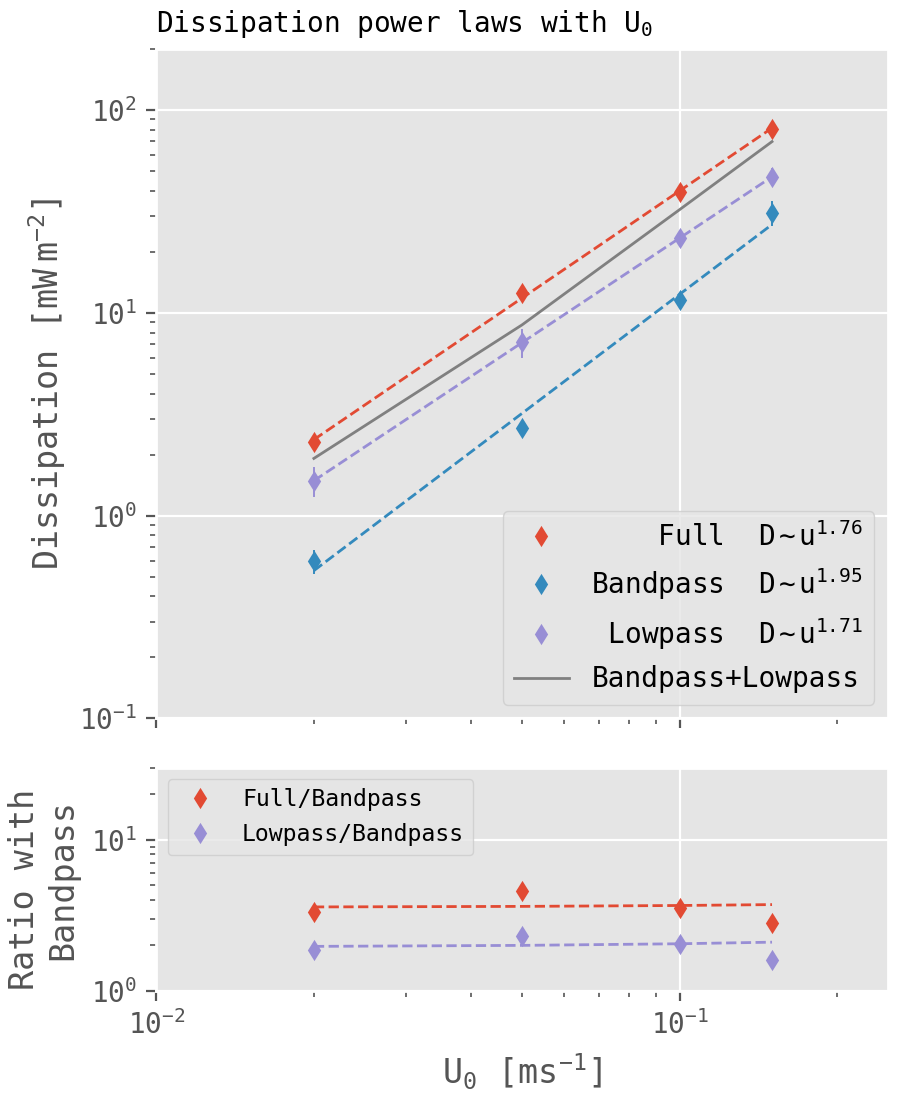

[  2.37082078  11.84695189  40.00909675  81.53459492]
[  0.53565411   3.19937115  12.36580135  27.27014631]
[  1.48733744   7.1427737   23.40827975  46.87261612]
32.937642492295986
['TempSpec', 'SnapsRegrid2UZoom', 'DissPowerLawAll', 'SnapsRegrid2U', 'TopoSpec', 'DepthsAndProfiles', 'MeanTemperatureProfiles', 'DissipationDists', 'TopoAll']
['TempSpec', 'SnapsRegrid2UZoom', 'DissPowerLawAll', 'SnapsRegrid2U', 'TopoSpec', 'DepthsAndProfiles', 'MeanTemperatureProfiles', 'DissipationDists', 'TopoAll']
doc/TempSpec.pdf
doc/TempSpec.png
doc/TempSpec.svg
doc/TempSpec.tex
doc/SnapsRegrid2UZoom.pdf
doc/SnapsRegrid2UZoom.png
doc/SnapsRegrid2UZoom.svg
doc/SnapsRegrid2UZoom.tex
doc/DissPowerLawAll.pdf
doc/DissPowerLawAll.png
doc/DissPowerLawAll.svg
doc/DissPowerLawAll.tex
doc/SnapsRegrid2U.pdf
doc/SnapsRegrid2U.png
doc/SnapsRegrid2U.svg
doc/SnapsRegrid2U.tex
doc/TopoSpec.pdf
doc/TopoSpec.png
doc/TopoSpec.svg
doc/TopoSpec.tex
doc/DepthsAndProfiles.pdf
doc/DepthsAndProfiles.png
doc/DepthsAndProfiles

In [81]:
fig,axs = plt.subplots(2,1,figsize=(4.5,5.5), sharex=True,
                       gridspec_kw = {'height_ratios':[3,1]},
                      constrained_layout=True)
ax = axs[0]
u = np.array([2.,5.,10.,15.])/100.
runs = ['Full','Lowpass','Bandpass']
cc = [[], [], []]
for i in [0,2,1]:
    d = (bf[i,:] - diss[i,:])/2. + diss[i,:]
    aa=np.polyfit(np.log(u[0:]),np.log(d[0:]),deg=1)
    dd = np.exp(aa[1])*u**(aa[0])
    hh,=ax.loglog(u, d, 'd', ms=4, label='%8s  $D\sim u^{%1.2f}$'%(runs[i],aa[0]))
    cc[i] = hh.get_color()
    for jj in range(4):
        ax.loglog(u[jj]+[0,0], [diss[i,jj],bf[i,jj]], 
                  color=hh.get_color(), lw=0.7)
    c=cc[i]
    # fit power law
    print(dd)
    hh1,=ax.loglog(u,dd, ls='--', lw=1, 
                   color=c)
    
ax.loglog(u,np.sum(diss[1:,:],axis=0), '-', lw=1,
          color='0.5', ms=4, label='Bandpass+Lowpass')
#ax.loglog(u,u*u*diss[0]/(u*u)[0],'--')
    
ax.legend(loc='lower right')
ax.set_ylabel('Dissipation $[mW\ m^{-2}]$')
ax.set_xlim([0.01,0.25])
ax.set_ylim([0.1,200])
uuu = np.array([0.01,1.])
#ax.set_aspect(0.5)
#ax.plot(uuu,uuu**2/uuu[0]**2*0.1,'--')
#ax.plot(uuu,uuu**2/uuu[0]**2*0.4,'--')
ax.set_title('Dissipation power laws with $U_0$', 
             loc='left', fontsize='medium')

ax = axs[1]
h,=ax.loglog(u, diss[0,:]/diss[-1,:], 'd', 
             ms=4, label='Full/Bandpass', c = cc[0])
c=h.get_color()
ax.loglog(u,u+np.mean(diss[0,:]/diss[-1,:]), lw=1.,
          ls='--',c=cc[0])

h,=ax.loglog(u, diss[1,:]/diss[-1,:], 'd', 
             label='Lowpass/Bandpass', ms=4, c=cc[1])
c=h.get_color()
ax.loglog(u,u+np.mean(diss[1,:]/diss[-1,:]), lw=1., 
          ls='--', c=cc[1])
ax.set_xlabel('$U_0$ $[ms^{-1}]$')
ax.legend(loc='upper left',fontsize='small')
ax.set_ylim([1,30.])
ax.set_ylabel('Ratio with \nBandpass')
# theoretical
Uu0 = np.array([0.02,0.05,0.1,0.15])
Uu0 = np.logspace(-1.8,-0.8,100)
Uu0 = 0.1
hm = 500
dx = 100e3
D = Uu0*(N0*Uu0*hm**2*np.pi/2.)*(1.+ np.pi*(Uu0/N0/hm) - 2*np.pi**2*(Uu0/N0/hm)**2)/dx*1e6
print(D)
#axs[0].loglog(Uu0,D)
#fig.tight_layout()
if 1:
    jmkfigure.jmkprint('DissPowerLawAll','PlotEnergySpeeds.ipynb')
    addtojson('DissPowerLawAll')

# Vertical integral dissipation

In [65]:
with open('LWRegrid2/VertEpsLWRegrid2full01U100000014400.pickle','rb') as f:
    veps = pickle.load(f,encoding='latin1')
    

<IPython.core.display.Javascript object>


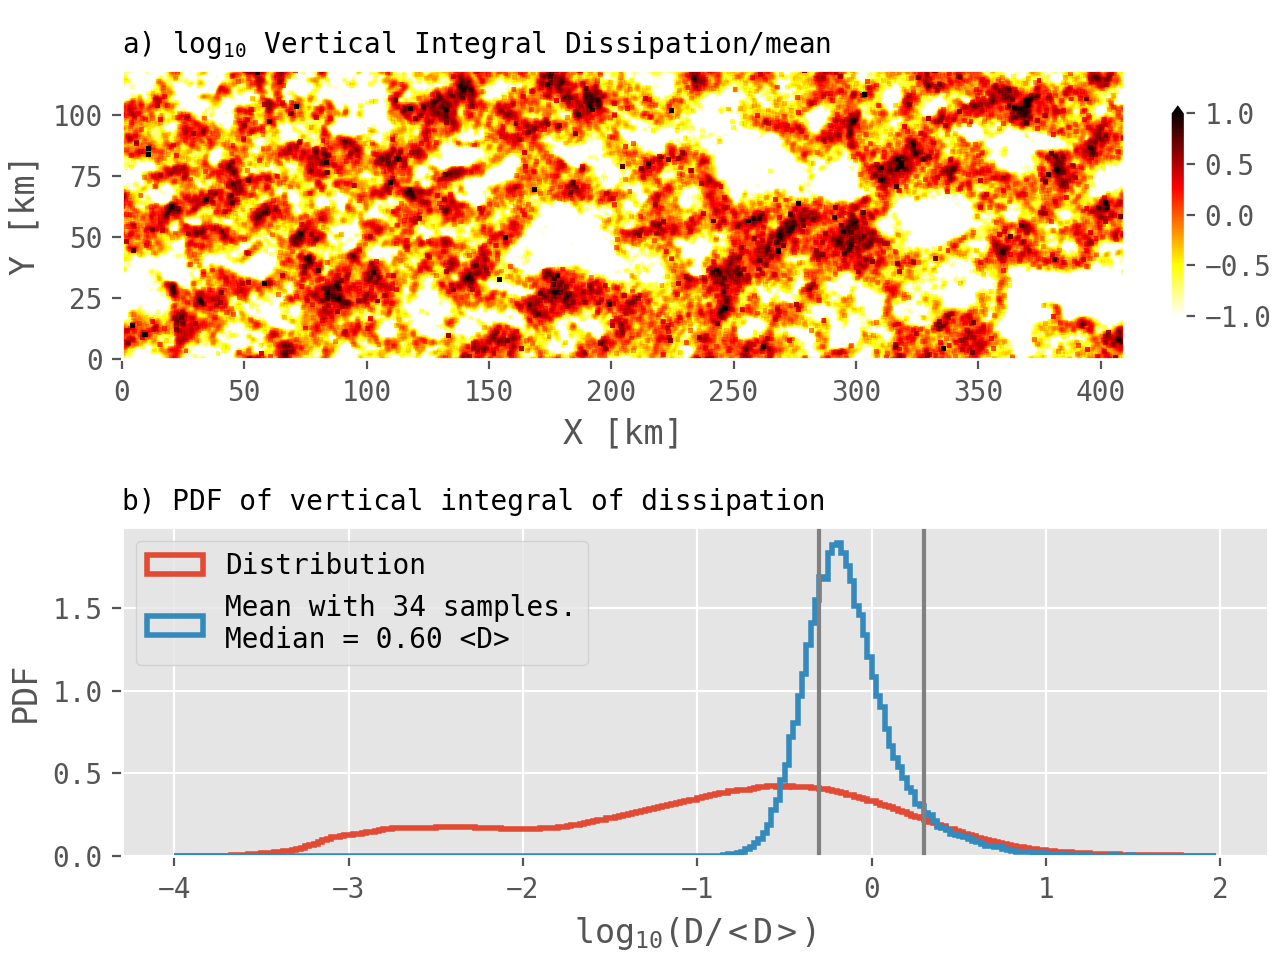

[[  13.8131746     6.79972478    8.18356004 ...,   86.92887202
    16.75151255    8.55571279]
 [  36.18917291   19.07258065    8.46706981 ...,   89.63387148
    32.50504301   31.51679848]
 [  12.9616001    21.55652149  128.18798191 ...,   99.9683427    40.59538162
    19.97095121]
 ..., 
 [   5.87385277   10.13487221    9.82075817 ...,    3.16117977
     4.76619536    5.79365427]
 [   8.0997303    11.07374065    3.92660964 ...,    0.37873714
     7.26783513   10.25526854]
 [   2.06058051    0.90045102    0.41353052 ...,   17.52007883
    10.58463032    1.49114179]]
['TempSpec', 'SnapsRegrid2UZoom', 'DissPowerLawAll', 'SnapsRegrid2U', 'TopoSpec', 'DepthsAndProfiles', 'MeanTemperatureProfiles', 'DissipationDists', 'TopoAll']
['TempSpec', 'SnapsRegrid2UZoom', 'DissPowerLawAll', 'SnapsRegrid2U', 'TopoSpec', 'DepthsAndProfiles', 'MeanTemperatureProfiles', 'DissipationDists', 'TopoAll']
doc/TempSpec.pdf
doc/TempSpec.png
doc/TempSpec.svg
doc/TempSpec.tex
doc/SnapsRegrid2UZoom.pdf
doc/SnapsReg

In [76]:
fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(2, 1, fig=fig)
gs0 = gridspec.GridSpecFromSubplotSpec(1, 1, gs[0])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1, gs[1])

eps = veps['eps'][0]*1e6
x = veps['x']/1000.
y = veps['y']/1000.
print(eps)
import scipy.ndimage.filters as scifilt
e = scifilt.uniform_filter(eps,size=20,mode='constant')

ax=fig.add_subplot(gs0[0])

pcm=ax.pcolormesh(x,y,np.log10(e/np.mean(eps)),rasterized=True,cmap='hot_r',vmin=-1.,vmax=1.)
ax.set_aspect(1.)
ax.set_xlim([x.min(),x.max()])
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_title('a) $log_{10}$ Vertical Integral Dissipation/mean',loc='left',fontsize=10)
cb = fig.colorbar(pcm,ax=ax,shrink=0.6,extend='both', fraction=0.07, 
                  ticks=np.arange(-1.,1.1,0.5))

ax=fig.add_subplot(gs1[0])
ax.axvline(np.log10(0.5),color='0.5');
ax.axvline(np.log10(2.),color='0.5');
ee = eps.flatten()/np.mean(eps)
ax.hist(np.log10(ee),np.arange(-4.,2.,0.025),normed=True,histtype='step',lw=2,label='Distribution')
NMonte = 10000*10
epsm = np.zeros(NMonte)
Nsamples=34
for i in range(NMonte):
    r = np.random.randint(0,len(ee),(Nsamples))
    epsm[i]=np.mean(ee[r])
ax.hist(np.log10(epsm),np.arange(-4.,2.,0.025),normed=True,histtype='step',lw=2,
        label='Mean with %d samples.\nMedian = %4.2f <D>'%(Nsamples,10**(-0.22)))
ax.legend(loc=2)
ax.set_xlabel('$log_{10}(D/<D>)$')
ax.set_ylabel('PDF')
ax.set_title('b) PDF of vertical integral of dissipation',loc='left',fontsize=10)
pbad = np.sum((epsm>2)|(epsm<0.5))/np.sum(epsm>-1.)
if 1:
    jmkfigure.jmkprint('DissipationDists','PlotEnergyCoarse.ipynb')
    addtojson('DissipationDists')


# Compare resolutions

In [7]:
if 0:
    res1km = [10,20,30,40,60,80,100,153,200,307]
    dedts=np.zeros(len(res1km));bfs=np.zeros(len(res1km));verts=np.zeros(len(res1km));resids=np.zeros(len(res1km));

    for nn,resn in enumerate(res1km[1:]):
        dedts[nn+1],bfs[nn+1],verts[nn+1],resids[nn+1]=makeEnergy('LW1km%dm'%resn)
    bfs1km = bfs

    res = [10,20,40,100,153,200,307]
    dedts=np.zeros(len(res));bfs=np.zeros(len(res));verts=np.zeros(len(res));resids=np.zeros(len(res));

    dedts[0],bfs[0],verts[0],resids[0] = makeEnergy('LW4km',U0=10)
    for nn,resn in enumerate(res[1:]):
        dedts[nn+1],bfs[nn+1],verts[nn+1],resids[nn+1]=makeEnergy('LW4km%dm'%resn)
    bfs4km = bfs
with xr.open_dataset('LW1kmU10EnergyTotals.nc') as en1km:
    print(en1km)
with xr.open_dataset('LW2p5kmU10EnergyTotals.nc') as en1km:
    print(en1km)
with xr.open_dataset('LW4kmU10EnergyTotals.nc') as en4km:
    print(en4km)


<xarray.Dataset>
Dimensions:  (U0: 1, dzs: 9)
Coordinates:
  * dzs      (dzs) float64 20.0 30.0 40.0 60.0 80.0 100.0 153.0 200.0 307.0
  * U0       (U0) float64 0.1
Data variables:
    bfs      (U0, dzs) float64 24.7 21.51 20.44 19.14 17.41 17.61 16.49 ...
    dx       float64 1.0
    dedts    (U0, dzs) float64 -3.271 -2.197 -2.436 -2.407 -1.454 -2.45 ...
    resids   (U0, dzs) float64 21.42 19.31 18.0 16.71 15.93 15.14 14.05 ...
    verts    (U0, dzs) float64 -0.004642 -0.00812 -0.009427 -0.01627 ...
<xarray.Dataset>
Dimensions:  (U0: 1, dzs: 6)
Coordinates:
  * dzs      (dzs) float64 25.0 50.0 100.0 153.0 200.0 307.0
  * U0       (U0) float64 0.1
Data variables:
    bfs      (U0, dzs) float64 30.2 24.34 24.19 21.98 16.61 14.36
    dx       float64 2.487
    dedts    (U0, dzs) float64 -2.578 -2.361 -7.688 -8.153 -0.3904 -8.462
    resids   (U0, dzs) float64 27.62 21.97 16.46 13.7 16.08 5.827
    verts    (U0, dzs) float64 -0.004059 -0.01514 -0.04658 -0.129 -0.1377 ...
<xarray.Dataset>

###  DzDependenceU10Low

<IPython.core.display.Javascript object>


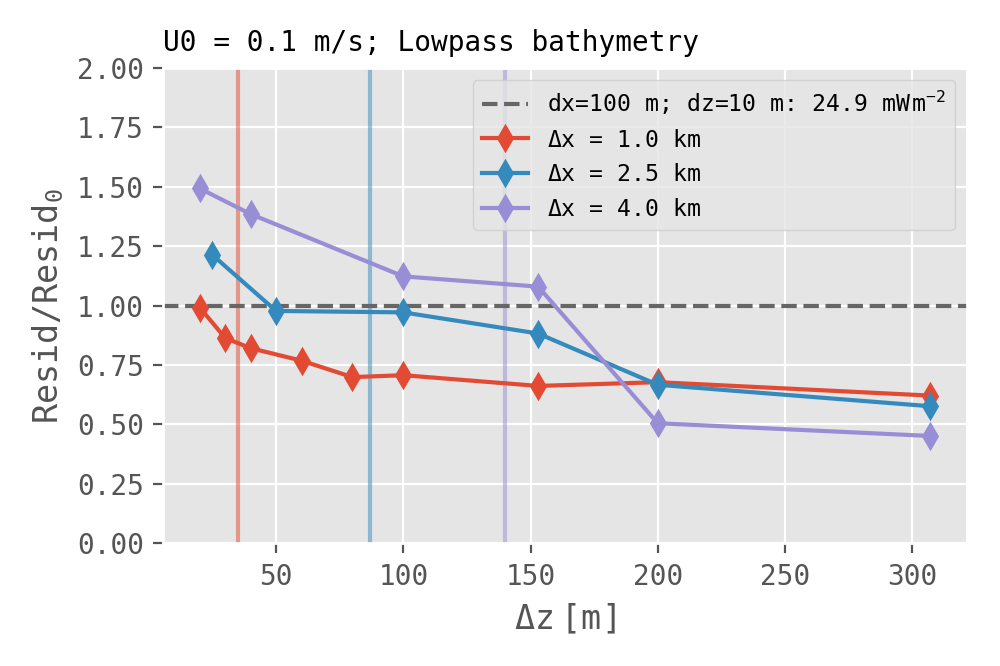

LW1kmU10EnergyTotals.nc
***************************
<xarray.Dataset>
Dimensions:  (U0: 1, dzs: 9)
Coordinates:
  * dzs      (dzs) float64 20.0 30.0 40.0 60.0 80.0 100.0 153.0 200.0 307.0
  * U0       (U0) float64 0.1
Data variables:
    bfs      (U0, dzs) float64 24.7 21.51 20.44 19.14 17.41 17.61 16.49 ...
    dx       float64 1.0
    dedts    (U0, dzs) float64 -3.271 -2.197 -2.436 -2.407 -1.454 -2.45 ...
    resids   (U0, dzs) float64 21.42 19.31 18.0 16.71 15.93 15.14 14.05 ...
    verts    (U0, dzs) float64 -0.004642 -0.00812 -0.009427 -0.01627 ...
LW2p5kmU10EnergyTotals.nc
***************************
<xarray.Dataset>
Dimensions:  (U0: 1, dzs: 6)
Coordinates:
  * dzs      (dzs) float64 25.0 50.0 100.0 153.0 200.0 307.0
  * U0       (U0) float64 0.1
Data variables:
    bfs      (U0, dzs) float64 30.2 24.34 24.19 21.98 16.61 14.36
    dx       float64 2.487
    dedts    (U0, dzs) float64 -2.578 -2.361 -7.688 -8.153 -0.3904 -8.462
    resids   (U0, dzs) float64 27.62 21.97 16.46 13.7 

In [82]:
td = ['LW1kmU10EnergyTotals.nc','LW2p5kmU10EnergyTotals.nc','LW4kmU10EnergyTotals.nc'] # ,'LW8kmU10EnergyTotals.nc','LW16kmU10EnergyTotals.nc']
fig,ax = plt.subplots(figsize=(5,4.*5./6.), tight_layout=True)

ax.axhline(24.9/24.9,ls='--',label='dx=100 m; dz=10 m: 24.9 $mW\,m^{-2}$', color='0.4')
for i in range(len(td)):
    print(td[i])
    print('***************************')
    with xr.open_dataset(td[i]) as en:
        print(en)
        hh, = ax.plot(en.dzs,en.bfs[0,:]/24.9,'d-',label=('$\Delta x$ = %1.1f km'%en.dx))
        
        ax.axvline(en.dx * 1e3 * 0.035, color=hh.get_color(),zorder=1, alpha=0.5)
ax.legend(fontsize='small')
ax.set_xlabel('$\Delta z\ [m]$')
ax.set_ylabel('$Resid/Resid_0$')
ax.set_title('U0 = 0.1 m/s; Lowpass bathymetry',loc='left', fontsize='medium')
#ax.set_yscale('log')
ax.set_ylim([0.0,2.])

if 1:
    jmkfigure.jmkprint('DzDependenceU10Low','EnergyOverviews.ipynb')
    addtojson('DzDependenceU10Low')

In [159]:
%ls -halt LW1km153m/*.pickle


-rw-r-----  1 jklymak  staff    31K May  4 18:06 LW1km153m/EnergyDemeanLW1km153mlow01U100000721800.pickle
-rw-r-----  1 jklymak  staff   113K May  4 17:42 LW1km153m/EnergyDemeanLW1km30mlow01U100000721800.pickle
-rw-r-----  1 jklymak  staff    46K May  4 17:42 LW1km153m/EnergyDemeanLW1km100mlow01U100000721800.pickle
-rw-r-----  1 jklymak  staff   179K May  4 17:42 LW1km153m/EnergyDemeanLW1km20mlow01U100000721800.pickle
-rw-r-----  1 jklymak  staff    59K May  4 17:42 LW1km153m/EnergyDemeanLW1km60mlow01U100000721800.pickle


# Compare topographic heights

In [3]:
tds = ['LW1km05h/EnergyDemeanLW1km05h0000721800.pickle',
       'LW1km07h/EnergyDemeanLW1km07h0000721800.pickle',
       'LWCoarse2/EnergyCW3dlow01U100000036090.pickle','LW1km15h/EnergyDemeanLW1km15h0000721800.pickle',
       'LW1km20h/EnergyDemeanLW1km20h0000721800.pickle',
      ]

ns = len(tds)
dedts=np.zeros(ns);bfs=np.zeros(ns);verts=np.zeros(ns);resids=np.zeros(ns);
for nn,td in enumerate(tds):
    print(nn)
    dedts[nn],bfs[nn],verts[nn],resids[nn]=makeEnergy(td,picklename=td)
print(bfs)

0
47509366153.84613
1
47509366153.84613
2
48002092307.69229
3
47509366153.84613
4
47509366153.84613
[  8.29697431  13.96752987  25.45110298  54.79305798  84.29538355]


<IPython.core.display.Javascript object>


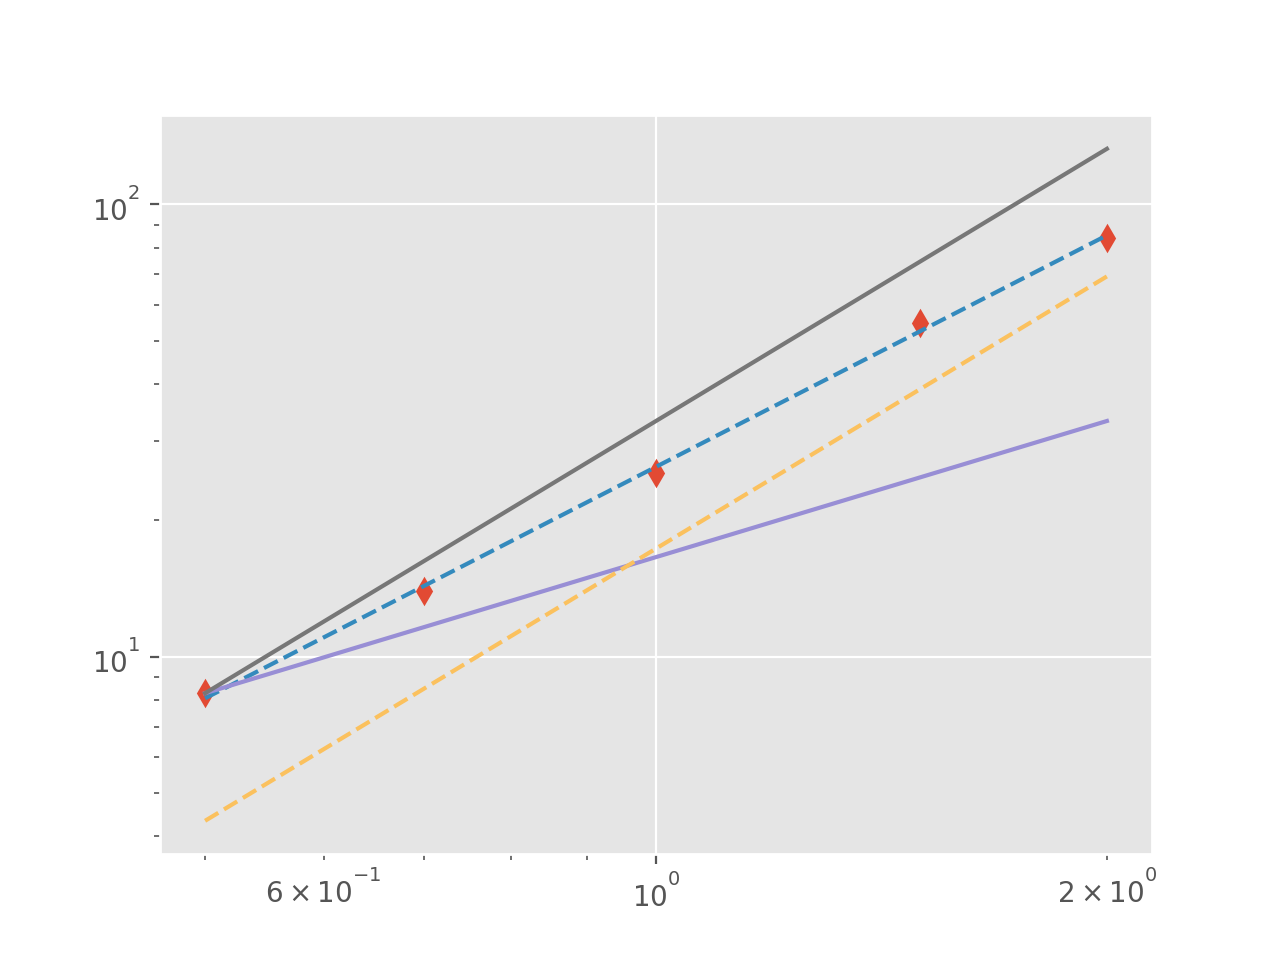

[ 1.70086607  1.41964703]
[  4.33200833   8.49073633  17.32803333  38.988075    69.31213333]


In [57]:
fig,ax=plt.subplots()
heights = np.array([0.5,0.7,1.,1.5,2.])
ax.loglog(heights,bfs,'d')
# fit:
p = np.polyfit(np.log10(heights),np.log10(bfs),1)
fit = (10.**(p[1]))*(heights**p[0])
print(p)
ax.loglog(heights,fit,'--')

ax.loglog(heights,heights/0.5*bfs[0])
ax.loglog(heights,(heights/0.5)**2*bfs[0])

hrms = heights*144.2
rho=1.e3;N0=1.e-3;U=0.1
param = rho*N0*U**2*hrms**2/12
#param = rho*N0*U**2*hrms*(4000-hrms)*np.pi/2./200.

ax.loglog(heights,param,'--')

#param = rho*N0*U**2*hrms*(4000-hrms)*np.pi/2./200.
#ax.loglog(heights,param,'--')
print(param)

TypeError: 'module' object is not subscriptable

# Play with decay

In [23]:
k = np.logspace(-3,-1,1000)
amp = k**(-2)

<IPython.core.display.Javascript object>


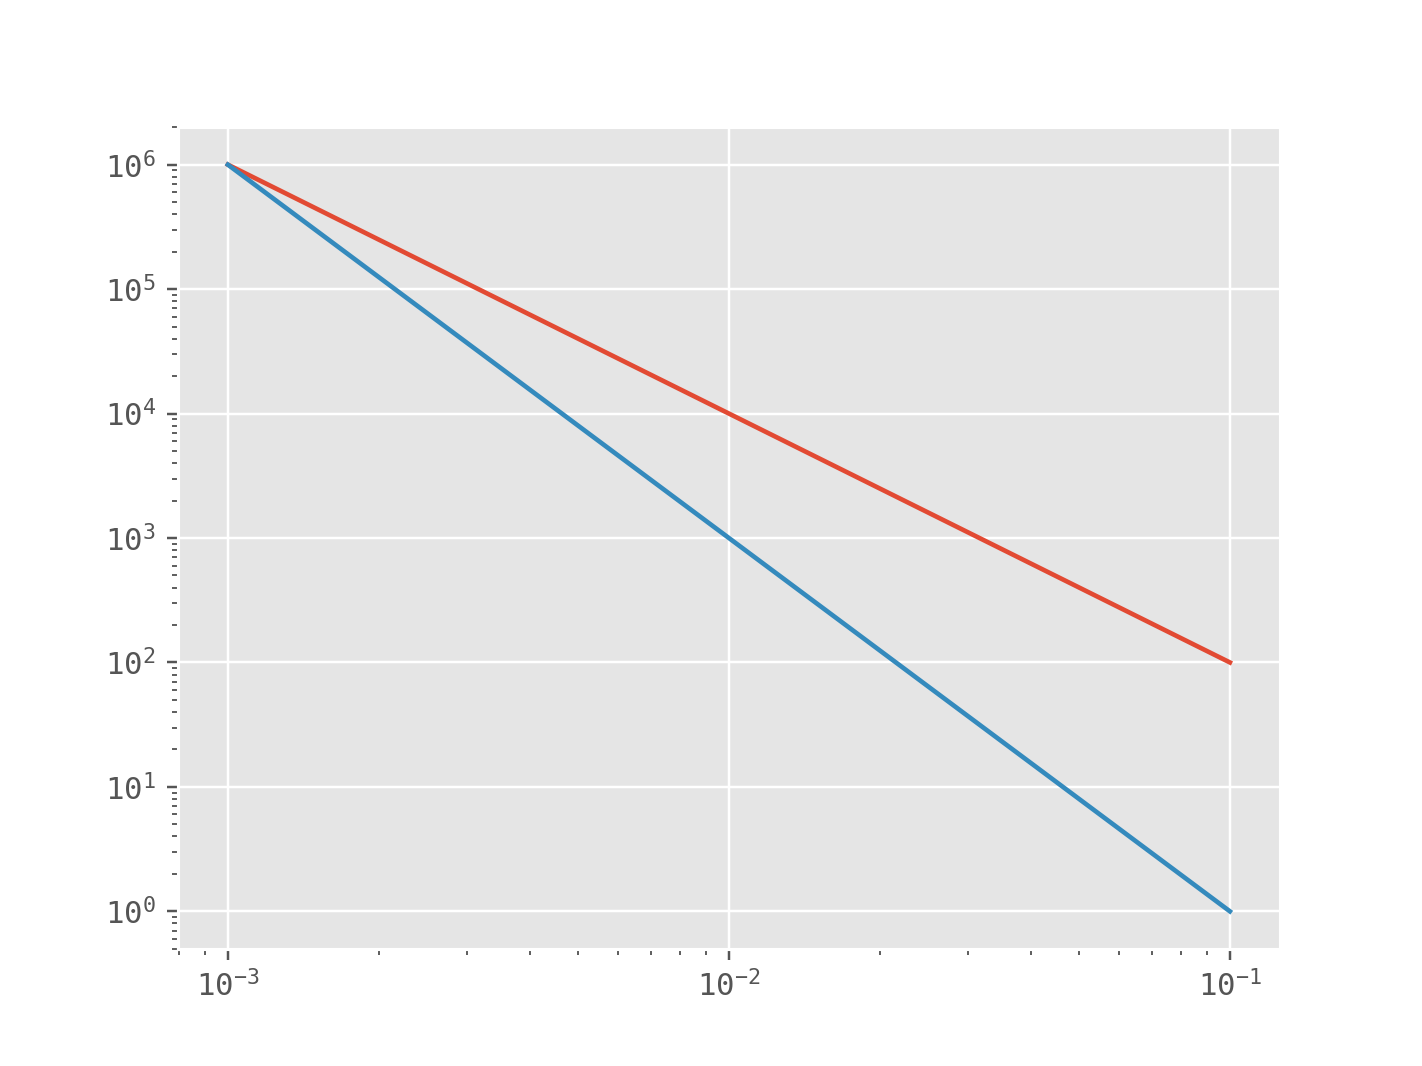

In [26]:
fig,ax=plt.subplots()
ax.loglog(k,amp)
ax.loglog(k,amp*k[0]/k)


In [32]:
UCu = (750/(0.5*np.pi*8**2))
print(UCu**(1./3)/0.42)

4.652337153552215


In [31]:
t = np.linspace(0,np.pi,10000)
print(np.mean(np.abs(np.cos(t))**3))

0.42447074026


# Check new nc files

In [77]:
en = xr.open_dataset('LWRegrid2/EnergyDemeanLWFilt2filt01U100000145800Step001.nc')

In [78]:
print(en)

<xarray.Dataset>
Dimensions:  (Z: 400)
Coordinates:
  * Z        (Z) float64 -5.0 -15.0 -25.0 -35.0 -45.0 -55.0 -65.0 -75.0 ...
    time     timedelta64[ns] 16 days 21:00:00
    iter     int64 145800
    PHrefC   (Z) float64 49.05 147.2 245.2 343.4 441.5 539.6 637.6 735.8 ...
    drF      (Z) float64 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 10.0 ...
Data variables:
    KE       (Z) float64 4.2e+06 4.188e+06 4.159e+06 4.12e+06 4.077e+06 ...
    PE       (Z) float64 1.739e+03 1.481e+03 4.155e+03 6.995e+03 1.006e+04 ...
    area     float64 7.88e+08
    dWPdz    (Z) float64 -0.0 -1.021 -1.124 -1.191 -1.211 -1.179 -1.121 ...
    Bf       (Z) float64 3.032 2.808 2.281 1.57 0.805 0.02311 -0.6862 -1.244 ...


In [79]:
nm = 'LWRegrid2/EnergyDemeanLWRegrid2%s01U%s0000073800Step*.nc'%(run,td)
ene = xr.open_mfdataset(nm)


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

# Get theoretical form drag

From Klymak et al 2010:

In [6]:

print(D)

[  1.5393804    9.6211275   38.48451001  86.59014751]


In [18]:
import psutil

for proc in psutil.process_iter():
    print(proc.get_open_files())

AttributeError: 'Process' object has no attribute 'get_open_files'

In [21]:
pid = os.getpid()
print(pid)


54146


In [22]:
%%bash
lsof -w -Ff -p 54146

p54146
fcwd
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
ftxt
f0
f1
f2
f3
f4
f5
f6
f7
f8
f9
f10
f11
f12
f13
f14
f15
f16
f17
f18
f19
f20
f21
f22
f23
f24
f25
f26
f27
f28
f29
f30
f31
f32
f